###  Regresión y regresión

# Plan
* Pasar y extensión py
* Abrir en spider
* Acumular resultados
* Cargar en power bi
* Dormir

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
conGraficos=True

# Funciones

In [4]:
def hm_corr_graf(corr_matrix_V2, cat):
    aux=pd.pivot_table(corr_matrix_V2,columns=['variable_2'],index=['variable_1'],values=['r'])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    sns.heatmap(
        aux,
        annot     = True,
        cbar      = False,
        annot_kws = {"size": 10},
        vmin      = -0.5,
        vmax      = 0.5,
        center    = 0,
        cmap      = sns.diverging_palette(20, 220, n=200),
        square    = True,
        ax        = ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )
    ax.tick_params(labelsize = 10)
    ax.set_title(cat)

In [5]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [6]:
def dic_corr_ind(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    #res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    #res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional=res_corr_total_raz_nacional.sort_values('variable_1')
    
    #return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones
    return res_corr_total_raz_nacional

In [7]:
def dic_corr_mes_ind(data):
    #res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,12):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
        #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        #dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,12):
        print(i)
        #aux_tab_var=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_causas2)]
        #aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        #aux_tab_var.columns=['variable_1',str(i)+'_r']
        ###aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        aux_tab_sel.columns=['variable_1',i]
        #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    #res_corr_total_var_T=res_corr_total_var.T
    #res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    #res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    #return res_corr_total_raz_T, res_corr_total_var_T
    return res_corr_total_raz_T

In [8]:
def iter_regresion_VIF(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            if fila_problema['VIF'].values[0]>20 :
                variables_eliminar=fila_problema['Features']
            else:
                flag=0 
                
    return df_revision

In [9]:
def iter_regresion(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            flag=0
            #fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            #if fila_problema['VIF'].values[0]>20 :
            #    variables_eliminar=fila_problema['Features']
            #else:                 
                
    return df_revision

In [10]:
def dic_reg_mes_ind(data_reg):
    df_coef=df_coef_nal
    df_vif=df_vif_nal
    dic_resultados={}
    
    for i in range(1,12):
        dic_aux={}
        data_aux=data_reg[data_reg['FECHA']==i] 
        data_aux.drop(columns=['FECHA'],inplace=True)
        #data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
        
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]    
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados[i]=dic_aux
    
    for i in range(1,12):
        print(i)

        aux_tab_coef=dic_resultados[i]['coef']
        aux_tab_vif=dic_resultados[i]['vif']

        #aux_tab_coef.columns=[str(i)+'_coef']
        aux_tab_coef.columns=[i]
        #aux_tab_vif.columns=['Features',str(i)+'_vif']
        aux_tab_vif.columns=['Features',i]

        df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
        df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

    return df_coef, df_vif

# Carga Preprocesamiento

In [11]:
data_c0= pd.read_csv('NODOS_FILTRADOS_NIVEL_NODOS.csv',sep=';', header = 0)

In [12]:
data_c0.describe()

,MES,CANT_USER,BAJAS_1.TOTAL,BAJAS_2.CHURN_TEMPRANO,BAJAS_3.CHURN_7_24,BAJAS_4.VOL,BAJAS_5.INVOL,BAJAS_6.VOL_CHURN_TEMPRANO,BAJAS_7.INVOL_CHURN_TEMPRANO,BAJAS_8.VOL_CHURN_7_24,...,BAJAS_36.@_INVOL_CHURN_7_24,ALFA,ALFA_tarifa,BETA,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
count,55960.000000,55960.000000,55960.000000,55960.000000,55960.000000,55960.000000,55960.000000,55960.000000,55960.000000,55960.000000,...,55960.000000,55488.000000,54727.000000,55789.000000,55960.000000,55960.000000,55960.000000,55678.000000,55907.000000,55956.000000
mean,7.500000,243.752001,0.082682,0.013928,0.026895,0.043521,0.039161,0.002358,0.011570,0.011134,...,0.006009,1.415117,0.938943,1.401266,2.012657,1.344213,0.599966,1.012057,0.477898,0.366095
std,2.291308,144.414623,0.052770,0.020954,0.028590,0.032958,0.042338,0.006402,0.019224,0.015521,...,0.008225,1.007001,0.187911,0.651087,0.520049,0.333500,0.235377,0.582038,0.151261,0.100148
min,4.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.367525,0.100062,0.534483,0.349206,0.057143,0.000000,0.000000,0.088575
25%,5.750000,129.000000,0.046875,0.000000,0.000000,0.022727,0.005291,0.000000,0.000000,0.000000,...,0.000000,0.634209,0.798178,0.941704,1.638544,1.103704,0.427861,0.553917,0.364736,0.292886
50%,7.500000,221.000000,0.074074,0.005515,0.020325,0.038360,0.027972,0.000000,0.000000,0.004630,...,0.003215,1.205502,0.924874,1.249249,1.940594,1.311035,0.549894,0.959052,0.475710,0.352632
75%,9.250000,329.000000,0.109123,0.021127,0.040000,0.057692,0.057692,0.000000,0.017396,0.018018,...,0.009259,1.949565,1.063409,1.691069,2.321839,1.551839,0.724499,1.406651,0.590433,0.426373
max,11.000000,1366.000000,0.714286,0.409091,0.318182,0.670996,0.513966,0.137255,0.381818,0.183333,...,0.125000,3.869014,1.310594,3.087414,3.169943,2.049823,1.160719,2.205406,0.751089,0.581049


In [13]:
data_c0.columns

Index(['MES', 'NODO', 'DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO',
       'CANT_USER', 'BAJAS_1.TOTAL', 'BAJAS_2.CHURN_TEMPRANO',
       'BAJAS_3.CHURN_7_24', 'BAJAS_4.VOL', 'BAJAS_5.INVOL',
       'BAJAS_6.VOL_CHURN_TEMPRANO', 'BAJAS_7.INVOL_CHURN_TEMPRANO',
       'BAJAS_8.VOL_CHURN_7_24', 'BAJAS_9.INVOL_CHURN_7_24', 'BAJAS_10.V',
       'BAJAS_11.V_CHURN_TEMPRANO', 'BAJAS_12.V_CHURN_7_24', 'BAJAS_13.V_VOL',
       'BAJAS_14.V_INVOL', 'BAJAS_15.V_VOL_CHURN_TEMPRANO',
       'BAJAS_16.V_INVOL_CHURN_TEMPRANO', 'BAJAS_17.V_VOL_CHURN_7_24',
       'BAJAS_18.V_INVOL_CHURN_7_24', 'BAJAS_19.T',
       'BAJAS_20.T_CHURN_TEMPRANO', 'BAJAS_21.T_CHURN_7_24', 'BAJAS_22.T_VOL',
       'BAJAS_23.T_INVOL', 'BAJAS_24.T_VOL_CHURN_TEMPRANO',
       'BAJAS_25.T_INVOL_CHURN_TEMPRANO', 'BAJAS_26.T_VOL_CHURN_7_24',
       'BAJAS_27.T_INVOL_CHURN_7_24', 'BAJAS_28.@',
       'BAJAS_29.@_CHURN_TEMPRANO', 'BAJAS_30.@_CHURN_7_24', 'BAJAS_31.@_VOL',
       'BAJAS_32.@_INVOL', 'BAJAS_33.@_VOL_CHURN_TEMPRANO

In [14]:
sel_variables_descrip=['MES','NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO','CANT_USER']
sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'MEGA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M','PENETRACION','OCUPACION_DW']
columns_bajas=list(data_c0.filter(regex=("BAJAS.*")).columns)

### Reemplazar nombre de columnas por compatibilidad

In [15]:
data_c0.rename(columns={'MES':'FECHA','NODO':'COD_NODO'}, inplace=True)

In [16]:
maestro_data=data_c0[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].drop_duplicates()

## CORRELACIONES

###  Correlacion Bajas Totales

##  Funcion validar configuraciones Nacional

In [17]:
list(data_c0.columns)

['FECHA',
 'COD_NODO',
 'DIVISION',
 'AREA',
 'ZONA',
 'CIUDAD',
 'DISTRITO',
 'CANT_USER',
 'BAJAS_1.TOTAL',
 'BAJAS_2.CHURN_TEMPRANO',
 'BAJAS_3.CHURN_7_24',
 'BAJAS_4.VOL',
 'BAJAS_5.INVOL',
 'BAJAS_6.VOL_CHURN_TEMPRANO',
 'BAJAS_7.INVOL_CHURN_TEMPRANO',
 'BAJAS_8.VOL_CHURN_7_24',
 'BAJAS_9.INVOL_CHURN_7_24',
 'BAJAS_10.V',
 'BAJAS_11.V_CHURN_TEMPRANO',
 'BAJAS_12.V_CHURN_7_24',
 'BAJAS_13.V_VOL',
 'BAJAS_14.V_INVOL',
 'BAJAS_15.V_VOL_CHURN_TEMPRANO',
 'BAJAS_16.V_INVOL_CHURN_TEMPRANO',
 'BAJAS_17.V_VOL_CHURN_7_24',
 'BAJAS_18.V_INVOL_CHURN_7_24',
 'BAJAS_19.T',
 'BAJAS_20.T_CHURN_TEMPRANO',
 'BAJAS_21.T_CHURN_7_24',
 'BAJAS_22.T_VOL',
 'BAJAS_23.T_INVOL',
 'BAJAS_24.T_VOL_CHURN_TEMPRANO',
 'BAJAS_25.T_INVOL_CHURN_TEMPRANO',
 'BAJAS_26.T_VOL_CHURN_7_24',
 'BAJAS_27.T_INVOL_CHURN_7_24',
 'BAJAS_28.@',
 'BAJAS_29.@_CHURN_TEMPRANO',
 'BAJAS_30.@_CHURN_7_24',
 'BAJAS_31.@_VOL',
 'BAJAS_32.@_INVOL',
 'BAJAS_33.@_VOL_CHURN_TEMPRANO',
 'BAJAS_34.@_INVOL_CHURN_TEMPRANO',
 'BAJAS_35.@_VOL_CH

In [18]:
#data_c0['BAJAS_1.TOTAL'].sum()
data_c0['BAJAS_31.@_VOL'].sum()


918.7501676100675

In [19]:
data_c0['ind_churn']=data_c0['BAJAS_31.@_VOL']

In [20]:
data_c0['COD_NODO'].value_counts().min()

8

In [21]:
#Eliminar validación ==1
data_c0['val_ind']=np.where(data_c0['ind_churn']==0,1,0)

In [22]:
data_c0.groupby('COD_NODO')[['val_ind']].max().describe()

,val_ind
count,6995.000000
mean,0.383989
std,0.486390
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [23]:
data_c0['COD_NODO'].nunique()

6995

In [24]:
res_nodo=data_c0.groupby('COD_NODO')[['val_ind']].max()

In [25]:
res_nodo['val_ind'].value_counts()

0    4309
1    2686
Name: val_ind, dtype: int64

In [26]:
# TODA LA DATA
#data_c0=data_c0[data_c0['COD_NODO'].isin(res_nodo[res_nodo['val_ind']==0].index)]

In [27]:
data_c0['COD_NODO'].nunique()

6995

# Val Configuraciones

In [28]:
DataSetEntregable_totales=pd.DataFrame()

In [29]:
DataSetEntregable_totales_temp=pd.DataFrame()

In [30]:
res_corr_total_raz_nacional=dic_corr_ind(data_c0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
res_corr_total_raz_nacional.rename(columns={'r':'NACIONAL'},inplace=True)

In [32]:
RV_nal_c0=dic_corr_ind(data_c0)

In [33]:
RV_nal_c0.rename(columns={'r':'NACIONAL'},inplace=True)

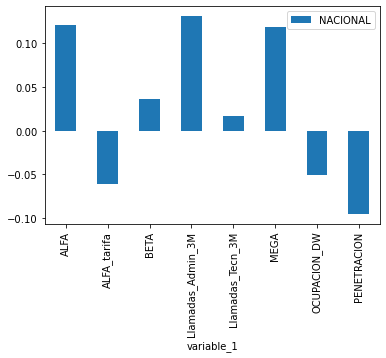

In [34]:
if conGraficos:
    RV_nal_c0.set_index('variable_1').plot.bar()

In [35]:
DataSetEntregable_totales=RV_nal_c0.copy()

In [36]:
DataSetEntregable_totales=DataSetEntregable_totales.set_index('variable_1').T

### Correlaciones x Periodo

### Funcion correlaciones por periodo
* Recibe los datos y retorna data framames para graficar

In [37]:
#(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_c0)
res_corr_total_raz_T=dic_corr_mes_ind(data_c0)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.113473,-0.116221,0.048232,0.137626,0.040022,0.098937,-0.061427,-0.112108
5,0.132189,-0.061636,0.036258,0.121468,0.012763,0.132117,-0.043959,-0.104712
6,0.146477,-0.093258,0.047473,0.127963,0.033946,0.145703,-0.057137,-0.10216
7,0.126969,-0.094465,0.028269,0.141787,0.053779,0.129167,-0.074415,-0.096428
8,0.123467,-0.029512,0.028697,0.13409,0.020207,0.133289,-0.032499,-0.084133
9,0.12559,-0.077617,0.015008,0.155772,0.02689,0.1328,-0.072925,-0.089775
10,0.12556,-0.002588,0.00913,0.183661,0.026598,0.147172,-0.030008,-0.073488


In [39]:
DataSetEntregable_totales_temp=res_corr_total_raz_T.copy()

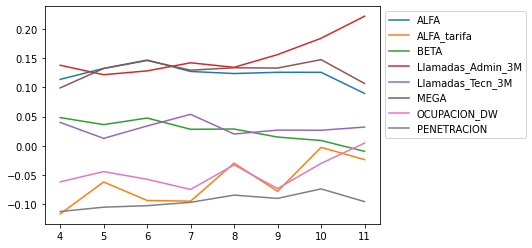

In [40]:
if conGraficos:
    ax = res_corr_total_raz_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

### Analisis Específicos

In [41]:
#data=data_c0.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')
data=data_c0.copy()

In [42]:
data.groupby('DIVISION')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False)

,CANT_USER
DIVISION,
REGION CENTRO,7043531
REGION OCCIDENTE,2731415
REGION NOROCCIDENTE,2075509
REGION ORIENTE,1016617
REGION COSTA,773290


In [43]:
data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6)

,CANT_USER
CIUDAD,
BOGOTA,6891515
CALI,1616306
MEDELLIN,1213181
BARRANQUILLA,564678
PEREIRA,345238
PASTO,339320


In [44]:
data[data['CIUDAD']=='BOGOTA'].groupby('AREA')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(10)

,CANT_USER
AREA,
BOGOTA ORIENTE,1854300
BOGOTA NORTE,1803563
BOGOTA OCCIDENTE,1679868
BOGOTA SUR,1553784


### Analisis regionales

In [45]:
regionales=data['DIVISION'].unique()
regionales = [x for x in regionales if pd.notnull(x)]
regionales

['REGION OCCIDENTE',
 'REGION COSTA',
 'REGION ORIENTE',
 'REGION CENTRO',
 'REGION NOROCCIDENTE']

In [46]:
dic_resultados={}

In [47]:
for reg in regionales:
    print(reg)
    dic_aux={}
    data_aux=data[data['DIVISION']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados[reg]=dic_aux

REGION OCCIDENTE
REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE


In [48]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in regionales:
    print(reg)
    #aux_tab_var=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg]
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

REGION OCCIDENTE
REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
res_corr_total_raz_nacional

,variable_1,NACIONAL
1909,ALFA,0.120916
1958,ALFA_tarifa,-0.061082
2007,BETA,0.036516
2105,Llamadas_Admin_3M,0.131093
2154,Llamadas_Tecn_3M,0.016863
2203,MEGA,0.118928
2252,OCUPACION_DW,-0.050160
2301,PENETRACION,-0.095322


In [50]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [51]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.120916,-0.061082,0.036516,0.131093,0.016863,0.118928,-0.05016,-0.095322
REGION OCCIDENTE,0.175588,-0.004993,0.036127,0.196843,0.011056,0.180531,-0.051547,-0.119537
REGION COSTA,0.120101,-0.012185,0.0681,0.161052,0.093769,0.087811,-0.060905,-0.13196
REGION ORIENTE,0.092886,-0.0004,0.018342,0.213415,0.036588,0.087857,-0.015953,-0.106082
REGION CENTRO,0.114196,-0.118164,0.041149,0.103804,0.011365,0.107905,-0.051448,-0.106554
REGION NOROCCIDENTE,0.092087,-0.00773,0.01912,0.137537,0.045526,0.098557,-0.036255,-0.049928


In [52]:
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.120916,-0.061082,0.036516,0.131093,0.016863,0.118928,-0.05016,-0.095322
REGION OCCIDENTE,0.175588,-0.004993,0.036127,0.196843,0.011056,0.180531,-0.051547,-0.119537
REGION COSTA,0.120101,-0.012185,0.0681,0.161052,0.093769,0.087811,-0.060905,-0.13196
REGION ORIENTE,0.092886,-0.0004,0.018342,0.213415,0.036588,0.087857,-0.015953,-0.106082
REGION CENTRO,0.114196,-0.118164,0.041149,0.103804,0.011365,0.107905,-0.051448,-0.106554
REGION NOROCCIDENTE,0.092087,-0.00773,0.01912,0.137537,0.045526,0.098557,-0.036255,-0.049928


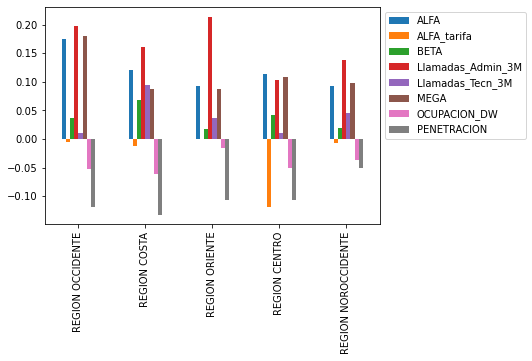

In [53]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(30,20));

### Analisis Temporal_ ESPECIFICO

In [54]:
## guardar en tabla
for reg in regionales:
    data_aux=data[data['DIVISION']==reg]    
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
DataSetEntregable_totales_temp['CATEGORIA']=DataSetEntregable_totales_temp['CATEGORIA'].fillna('NACIONAL')

In [56]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NACIONAL
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NACIONAL
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NACIONAL
4,0.113473,-0.116221,0.048232,0.137626,0.040022,0.098937,-0.061427,-0.112108,NACIONAL
5,0.132189,-0.061636,0.036258,0.121468,0.012763,0.132117,-0.043959,-0.104712,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.088631,-0.042411,0.031518,0.173024,0.102968,0.08067,-0.071222,-0.040751,REGION NOROCCIDENTE
8,0.083571,0.059086,-0.012625,0.152142,0.010483,0.100649,0.032896,-0.011329,REGION NOROCCIDENTE
9,0.060209,-0.135393,-0.02943,0.113313,0.026385,0.097155,-0.056659,-0.00585,REGION NOROCCIDENTE
10,0.062915,0.014236,-0.073567,0.151886,-0.028589,0.153389,0.050088,0.029559,REGION NOROCCIDENTE


## Ciudades

In [57]:
ciudades=data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6).index
ciudades

Index(['BOGOTA', 'CALI', 'MEDELLIN', 'BARRANQUILLA', 'PEREIRA', 'PASTO'], dtype='object', name='CIUDAD')

In [58]:
dic_resultados_ciudad={}

In [59]:
for reg in ciudades:
    print(reg)
    dic_aux={}
    data_aux=data[data['CIUDAD']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_ciudad[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
BARRANQUILLA
PEREIRA
PASTO


In [60]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in ciudades:
    print(reg)
    #aux_tab_var=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA
CALI
MEDELLIN
BARRANQUILLA
PEREIRA
PASTO


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [62]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.120916,-0.061082,0.036516,0.131093,0.016863,0.118928,-0.05016,-0.095322
BOGOTA,0.111562,-0.118932,0.040951,0.100576,0.01055,0.105702,-0.049265,-0.103521
CALI,0.205585,-0.041836,0.028477,0.169223,-0.023144,0.214337,-0.06594,-0.119109
MEDELLIN,0.106989,-0.027007,0.042717,0.153439,0.113718,0.098154,-0.078218,-0.135651
BARRANQUILLA,0.08973,0.019276,0.027182,0.158349,0.083106,0.081572,-0.044894,-0.109207
PEREIRA,0.061468,0.199646,-0.062572,0.136973,-0.125861,0.107531,0.092728,0.10519
PASTO,0.069439,0.030296,-0.001459,0.23047,0.0242,0.090817,0.035969,0.096141


In [63]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.120916,-0.061082,0.036516,0.131093,0.016863,0.118928,-0.05016,-0.095322
REGION OCCIDENTE,0.175588,-0.004993,0.036127,0.196843,0.011056,0.180531,-0.051547,-0.119537
REGION COSTA,0.120101,-0.012185,0.0681,0.161052,0.093769,0.087811,-0.060905,-0.13196
REGION ORIENTE,0.092886,-0.0004,0.018342,0.213415,0.036588,0.087857,-0.015953,-0.106082
REGION CENTRO,0.114196,-0.118164,0.041149,0.103804,0.011365,0.107905,-0.051448,-0.106554
REGION NOROCCIDENTE,0.092087,-0.00773,0.01912,0.137537,0.045526,0.098557,-0.036255,-0.049928
BOGOTA,0.111562,-0.118932,0.040951,0.100576,0.01055,0.105702,-0.049265,-0.103521
CALI,0.205585,-0.041836,0.028477,0.169223,-0.023144,0.214337,-0.06594,-0.119109
MEDELLIN,0.106989,-0.027007,0.042717,0.153439,0.113718,0.098154,-0.078218,-0.135651
BARRANQUILLA,0.08973,0.019276,0.027182,0.158349,0.083106,0.081572,-0.044894,-0.109207


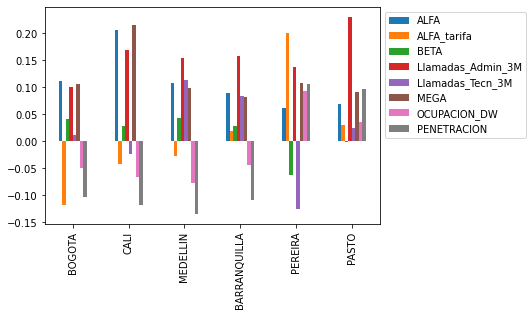

In [64]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

### Analisis temporal

In [65]:
## guardar en tabla
for reg in ciudades:
    data_aux=data[data['CIUDAD']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NACIONAL
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NACIONAL
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NACIONAL
4,0.113473,-0.116221,0.048232,0.137626,0.040022,0.098937,-0.061427,-0.112108,NACIONAL
5,0.132189,-0.061636,0.036258,0.121468,0.012763,0.132117,-0.043959,-0.104712,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.162386,-0.155772,0.042267,0.2257,0.246342,0.176773,-0.01656,-0.09825,PASTO
8,0.039952,0.094617,-0.071253,0.271347,-0.036961,0.03547,0.036517,0.1576,PASTO
9,-0.094223,0.024866,-0.19319,0.099244,-0.078995,0.028859,0.152242,0.043077,PASTO
10,0.036981,0.128772,-0.065847,0.175912,-0.073195,0.072559,0.224084,0.299116,PASTO


### Bogotá

In [67]:
sectoresBog=data[data['CIUDAD']=='BOGOTA']['AREA'].unique()

In [68]:
dic_resultados_Bogota={}

In [69]:
for reg in sectoresBog:
    print(reg)
    dic_aux={}
    data_aux=data[data['AREA']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_Bogota[reg]=dic_aux

BOGOTA SUR
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA NORTE


In [70]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in sectoresBog:
    print(reg)
    #aux_tab_var=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA SUR
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA NORTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


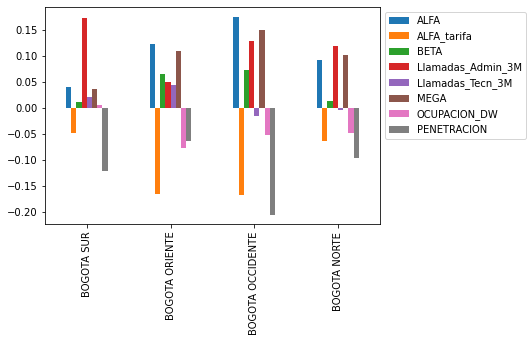

In [71]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]
if conGraficos:    
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

In [72]:
res_corr_total_raz_T[1:]

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
BOGOTA SUR,0.039629,-0.048224,0.011943,0.173661,0.020258,0.036701,0.00552,-0.122012
BOGOTA ORIENTE,0.123492,-0.165056,0.064772,0.050783,0.0442,0.110425,-0.077109,-0.064651
BOGOTA OCCIDENTE,0.175349,-0.167505,0.073618,0.129066,-0.01591,0.150309,-0.052858,-0.205561
BOGOTA NORTE,0.09194,-0.064756,0.013669,0.118364,-0.003937,0.101472,-0.047623,-0.096053


In [73]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.120916,-0.061082,0.036516,0.131093,0.016863,0.118928,-0.05016,-0.095322
REGION OCCIDENTE,0.175588,-0.004993,0.036127,0.196843,0.011056,0.180531,-0.051547,-0.119537
REGION COSTA,0.120101,-0.012185,0.0681,0.161052,0.093769,0.087811,-0.060905,-0.13196
REGION ORIENTE,0.092886,-0.0004,0.018342,0.213415,0.036588,0.087857,-0.015953,-0.106082
REGION CENTRO,0.114196,-0.118164,0.041149,0.103804,0.011365,0.107905,-0.051448,-0.106554
REGION NOROCCIDENTE,0.092087,-0.00773,0.01912,0.137537,0.045526,0.098557,-0.036255,-0.049928
BOGOTA,0.111562,-0.118932,0.040951,0.100576,0.01055,0.105702,-0.049265,-0.103521
CALI,0.205585,-0.041836,0.028477,0.169223,-0.023144,0.214337,-0.06594,-0.119109
MEDELLIN,0.106989,-0.027007,0.042717,0.153439,0.113718,0.098154,-0.078218,-0.135651
BARRANQUILLA,0.08973,0.019276,0.027182,0.158349,0.083106,0.081572,-0.044894,-0.109207


### Resultado Atemporal

In [74]:
### Guardar Archivo
##DataSetEntregable_totales.to_csv('CorrelacionesAgrupadas_14Dic.csv',sep=';')

### Temporales

In [75]:
## guardar en tabla
for reg in sectoresBog:
    data_aux=data[data['AREA']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Resulado Temporal

In [76]:
#DataSetEntregable_totales_temp.to_csv('CorrelacionesTemporales_14Dic.csv',sep=';')

# Regresión multilineal

* Reescalado
* Modelos

In [77]:
DataSetEntregable_totales_reg=pd.DataFrame()
DataSetEntregable_totales_temp_reg=pd.DataFrame()

In [78]:
data_reg=data_c0.copy()

In [79]:
data_reg=data_reg[data_reg['FECHA']>=6]

In [80]:
sel_variables_causas2.remove('PENETRACION')
sel_variables_causas2

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'OCUPACION_DW']

In [81]:
data_reg.set_index('COD_NODO',inplace=True)

In [82]:
data_reg=data_reg[sel_variables_causas2+['ind_churn','FECHA']]

In [83]:
data_reg.isnull().sum()/len(data_reg)

ALFA_tarifa          0.001811
ALFA                 0.000977
BETA                 0.000214
MEGA                 0.000477
Llamadas_Admin_3M    0.000000
Llamadas_Tecn_3M     0.000000
OCUPACION_DW         0.000000
ind_churn            0.000000
FECHA                0.000000
dtype: float64

In [84]:
data_reg=data_reg.dropna()

In [85]:
colums_reg=list(data_reg.columns)

In [86]:
colums_reg.remove('FECHA')

In [87]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'OCUPACION_DW',
 'ind_churn']

In [88]:
#for col in colums_reg:
#    data_reg[col]=np.log1p(data_reg[col])

In [89]:
## Escalar
#cols=data_reg.columns
scaler = MinMaxScaler()
data_reg[colums_reg]= scaler.fit_transform(data_reg[colums_reg])

In [90]:
colums_reg.remove('ind_churn')

In [91]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'OCUPACION_DW']

### Seleccion Variables Significativas

In [92]:
reg_nal=iter_regresion(data_reg)
reg_nal

1
      coefs       pvalues           Features    VIF
0 -0.019813  1.055332e-22        ALFA_tarifa   9.43
1  0.009995  8.959878e-03               ALFA  20.74
2  0.002839  3.543300e-01               BETA  13.13
3  0.026894  2.064597e-17               MEGA  16.11
4  0.086564  0.000000e+00  Llamadas_Admin_3M  13.51
5 -0.037465  1.466654e-72   Llamadas_Tecn_3M   8.62
6 -0.025747  4.490502e-44       OCUPACION_DW  10.02
      coefs  pvalues Features    VIF
2  0.002839  0.35433     BETA  13.13
2
      coefs       pvalues           Features    VIF
0 -0.019869  7.678937e-23        ALFA_tarifa   8.23
1  0.013014  7.924835e-11               ALFA   6.46
2  0.024617  6.862392e-35               MEGA   8.45
3  0.086559  0.000000e+00  Llamadas_Admin_3M  13.40
4 -0.037464  1.474257e-72   Llamadas_Tecn_3M   8.30
5 -0.025871  1.043660e-44       OCUPACION_DW   9.64
      coefs       pvalues Features   VIF
1  0.013014  7.924835e-11     ALFA  6.46


,coefs,pvalues,Features,VIF
0,-0.019869,7.678937e-23,ALFA_tarifa,8.23
1,0.013014,7.924835e-11,ALFA,6.46
2,0.024617,6.862392e-35,MEGA,8.45
3,0.086559,0.000000e+00,Llamadas_Admin_3M,13.40
4,-0.037464,1.474257e-72,Llamadas_Tecn_3M,8.30
5,-0.025871,1.043660e-44,OCUPACION_DW,9.64


In [93]:
colums_reg=list(reg_nal['Features'])
colums_reg

['ALFA_tarifa',
 'ALFA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'OCUPACION_DW']

### Nacional

In [94]:
# Dividir en X y X
y_train = data_reg['ind_churn']
X_train =  data_reg[colums_reg]

In [95]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ind_churn   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     412.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:59:45   Log-Likelihood:                 50976.
No. Observations:               41853   AIC:                        -1.019e+05
Df Residuals:                   41846   BIC:                        -1.019e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0839      0.002     39.643      0.000       0.080       0.088
ALFA_tarifa          -0.0199      0.002     -9.844      0.000      -0.024      -0.016
ALFA                  0.0130      0.002      6.504      0.000       0.009       0.017
MEGA                  0.0246      0.002     12.334      0.000       0.021       0.029
Llamadas_Admin_3M     0.0866      0.002     38.923      0.000       0.082       0.091
Llamadas_Tecn_3M     -0.0375      0.002    -18.051      0.000      -0.042      -0.033
OCUPACION_DW         -0.0259      0.002    -14.045      0.000      -0.029      -0.022
==============================================================================
Omnibus:                    17075.609   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148855.558
Skew:                           1.734   Prob(JB):                         0.00
Kurtosis:                      11.563   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Llamadas_Admin_3M,13.40
5,OCUPACION_DW,9.64
2,MEGA,8.45
4,Llamadas_Tecn_3M,8.30
0,ALFA_tarifa,8.23
1,ALFA,6.46


In [97]:
df_coef_nal=lr_1.params.to_frame()
df_coef_nal.columns=['coefs']

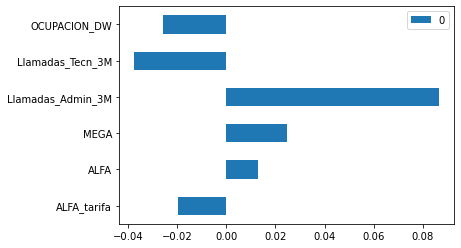

In [98]:
if conGraficos:
    lr_1.params.to_frame()[1:].plot.barh()

In [99]:
df_coef_nal

,coefs
const,0.083946
ALFA_tarifa,-0.019869
ALFA,0.013014
MEGA,0.024617
Llamadas_Admin_3M,0.086559
Llamadas_Tecn_3M,-0.037464
OCUPACION_DW,-0.025871


In [100]:
df_vif_nal=vif

In [101]:
DataSetEntregable_totales_reg=df_coef_nal.copy()

In [102]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg[1:].T
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
coefs,-0.019869,0.013014,0.024617,0.086559,-0.037464,-0.025871


In [103]:
DataSetEntregable_totales_reg['index']='NACIONAL'
DataSetEntregable_totales_reg.set_index('index',inplace=True)
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
index,,,,,,
NACIONAL,-0.019869,0.013014,0.024617,0.086559,-0.037464,-0.025871


## Regresión en el tiempo

In [104]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,
B1Z,0.599182,0.217824,1.000000,0.123459,0.776008,0.423575,1.000000,0.100042,11
RO4,0.600295,0.446469,0.398147,0.590382,0.544745,0.594185,0.819374,0.030211,7
KRI,0.759086,0.258304,0.454957,0.303539,0.474160,0.291602,0.421243,0.064238,7
RO33D,0.439091,0.635341,0.635000,0.551888,0.520170,0.535537,0.581488,0.000000,10
330031,0.471026,0.770679,1.000000,0.375563,1.000000,1.000000,0.442799,0.000000,10
...,...,...,...,...,...,...,...,...,...
S04,0.636143,0.731374,0.492593,0.800422,0.593974,0.356450,0.394294,0.124967,11
ACB,0.326805,0.646864,0.914474,0.399975,0.314139,0.286514,0.634300,0.000000,11
GD3,0.520465,0.323316,0.224072,0.693878,0.789643,0.589152,0.503363,0.223265,6


In [105]:
##(df_coef, df_vif)=dic_reg_mes_ind(data_reg)

In [106]:
##df_coef

In [107]:
##df_coef_T=df_coef.T
##df_coef_T.pop('const')
##df_coef_T=df_coef_T[1:]
##df_coef_T

In [108]:
##DataSetEntregable_totales_temp_reg=df_coef_T.copy()

In [109]:
##if conGraficos:
##    ax = df_coef_T.plot.line()
##    ax.legend(bbox_to_anchor=(1.0, 1.0))
##    ax.plot(figsize=(20,10));

## Analisis Específicos

In [110]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,
B1Z,0.599182,0.217824,1.000000,0.123459,0.776008,0.423575,1.000000,0.100042,11
RO4,0.600295,0.446469,0.398147,0.590382,0.544745,0.594185,0.819374,0.030211,7
KRI,0.759086,0.258304,0.454957,0.303539,0.474160,0.291602,0.421243,0.064238,7
RO33D,0.439091,0.635341,0.635000,0.551888,0.520170,0.535537,0.581488,0.000000,10
330031,0.471026,0.770679,1.000000,0.375563,1.000000,1.000000,0.442799,0.000000,10
...,...,...,...,...,...,...,...,...,...
S04,0.636143,0.731374,0.492593,0.800422,0.593974,0.356450,0.394294,0.124967,11
ACB,0.326805,0.646864,0.914474,0.399975,0.314139,0.286514,0.634300,0.000000,11
GD3,0.520465,0.323316,0.224072,0.693878,0.789643,0.589152,0.503363,0.223265,6


In [111]:
data_reg_nor=data_reg.copy()

In [112]:
data_reg_nor=data_reg_nor.merge(maestro_data, left_index=True, right_on=['COD_NODO'], how='left')
data_reg_nor.set_index('COD_NODO', inplace=True)

In [113]:
data_reg_nor_temp=data_reg_nor.copy()

In [114]:
data_reg_nor.pop('FECHA')

COD_NODO
B1Z       11
RO4        7
KRI        7
RO33D     10
330031    10
          ..
S04       11
ACB       11
GD3        6
SNT        8
5AJ023     7
Name: FECHA, Length: 43208, dtype: int64

## Regional

In [115]:
dic_resultados_reg={}

In [116]:
for reg in regionales:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    y_train = data_aux.pop('ind_churn')
    X_train = data_aux[colums_reg]    
    #Modelos
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()    
    dic_aux['coef']=lr_1.params.to_frame()
    dic_aux['coef'].columns=['coefs']
    # Cálculo VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    dic_aux['vif']=vif
    dic_resultados[reg]=dic_aux

REGION OCCIDENTE
REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE


In [117]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in regionales:
    print(reg)
    
    aux_tab_coef=dic_resultados[reg]['coef']
    aux_tab_vif=dic_resultados[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

REGION OCCIDENTE
REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE


In [118]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])

In [119]:
df_coef_T

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
coefs,-0.019869,0.013014,0.024617,0.086559,-0.037464,-0.025871
REGION OCCIDENTE,0.000124,0.013613,0.039125,0.152896,-0.051991,-0.030697
REGION COSTA,-0.013526,0.021062,0.009325,0.077552,-0.014303,-0.041225
REGION ORIENTE,-0.007826,0.015116,0.008444,0.127970,-0.033728,-0.016287
REGION CENTRO,-0.054597,0.012978,0.018310,0.090612,-0.032129,-0.024375
REGION NOROCCIDENTE,-0.016039,0.012216,0.043006,0.094513,-0.014529,-0.023401


In [120]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
NACIONAL,-0.019869,0.013014,0.024617,0.086559,-0.037464,-0.025871
REGION OCCIDENTE,0.000124,0.013613,0.039125,0.152896,-0.051991,-0.030697
REGION COSTA,-0.013526,0.021062,0.009325,0.077552,-0.014303,-0.041225
REGION ORIENTE,-0.007826,0.015116,0.008444,0.127970,-0.033728,-0.016287
REGION CENTRO,-0.054597,0.012978,0.018310,0.090612,-0.032129,-0.024375
REGION NOROCCIDENTE,-0.016039,0.012216,0.043006,0.094513,-0.014529,-0.023401


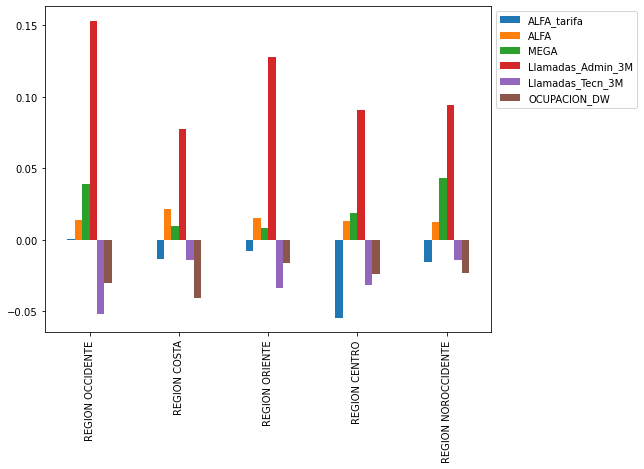

In [121]:
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

####  Analisis temporal

In [122]:
"""
for reg in regionales:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    
"""

"\nfor reg in regionales:\n    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] \n    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])\n    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)\n    df_coef_T=df_coef.T\n    df_coef_T.pop('const')\n    df_coef_T=df_coef_T[1:]\n    df_coef_T['CATEGORIA']=reg\n    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    \n"

In [123]:
#DataSetEntregable_totales_temp_reg['CATEGORIA']=DataSetEntregable_totales_temp_reg['CATEGORIA'].fillna('NACIONAL')

In [124]:
DataSetEntregable_totales_temp_reg

""


## Ciudades

In [125]:
dic_resultados_ciudad_reg={}
for reg in ciudades:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['CIUDAD']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_ciudad_reg[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
BARRANQUILLA
PEREIRA
PASTO


In [126]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_ciudad_reg:
    print(reg)    
    aux_tab_coef=dic_resultados_ciudad_reg[reg]['coef']
    aux_tab_vif=dic_resultados_ciudad_reg[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA
CALI
MEDELLIN
BARRANQUILLA
PEREIRA
PASTO


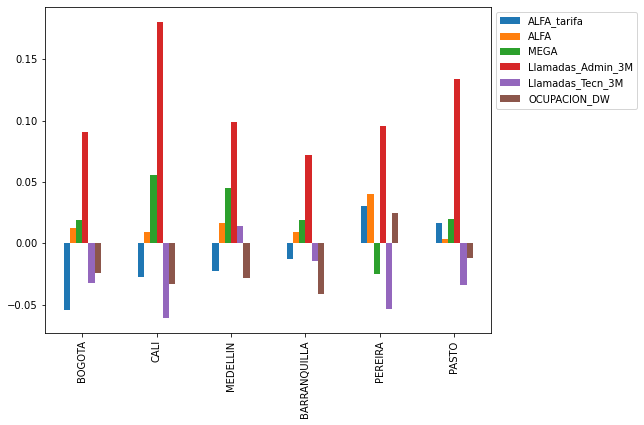

In [127]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [128]:
df_coef_T[1:]

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
BOGOTA,-0.054829,0.012278,0.018742,0.090708,-0.032682,-0.024550
CALI,-0.027899,0.009053,0.055817,0.180420,-0.061227,-0.033308
MEDELLIN,-0.022779,0.016219,0.044894,0.098422,0.013805,-0.028516
BARRANQUILLA,-0.012785,0.009457,0.018637,0.072143,-0.014552,-0.041439
PEREIRA,0.030013,0.040174,-0.025452,0.095301,-0.053440,0.024872
PASTO,0.016280,0.003105,0.020047,0.133836,-0.034199,-0.011814


In [129]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
NACIONAL,-0.019869,0.013014,0.024617,0.086559,-0.037464,-0.025871
REGION OCCIDENTE,0.000124,0.013613,0.039125,0.152896,-0.051991,-0.030697
REGION COSTA,-0.013526,0.021062,0.009325,0.077552,-0.014303,-0.041225
REGION ORIENTE,-0.007826,0.015116,0.008444,0.127970,-0.033728,-0.016287
REGION CENTRO,-0.054597,0.012978,0.018310,0.090612,-0.032129,-0.024375
REGION NOROCCIDENTE,-0.016039,0.012216,0.043006,0.094513,-0.014529,-0.023401
BOGOTA,-0.054829,0.012278,0.018742,0.090708,-0.032682,-0.024550
CALI,-0.027899,0.009053,0.055817,0.180420,-0.061227,-0.033308
MEDELLIN,-0.022779,0.016219,0.044894,0.098422,0.013805,-0.028516
BARRANQUILLA,-0.012785,0.009457,0.018637,0.072143,-0.014552,-0.041439


#### Analisis temporal

In [130]:
"""
for reg in ciudades:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)
"""

"\nfor reg in ciudades:\n    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]\n    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])\n    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)\n    df_coef_T=df_coef.T\n    df_coef_T.pop('const')\n    df_coef_T=df_coef_T[1:]\n    df_coef_T['CATEGORIA']=reg\n    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)\n"

In [131]:
DataSetEntregable_totales_temp_reg

""


## Bogota

In [132]:
dic_resultados_Bogota={}
for reg in sectoresBog:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['AREA']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_Bogota[reg]=dic_aux

BOGOTA SUR
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA NORTE


In [133]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_Bogota:
    print(reg)    
    aux_tab_coef=dic_resultados_Bogota[reg]['coef']
    aux_tab_vif=dic_resultados_Bogota[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA SUR
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA NORTE


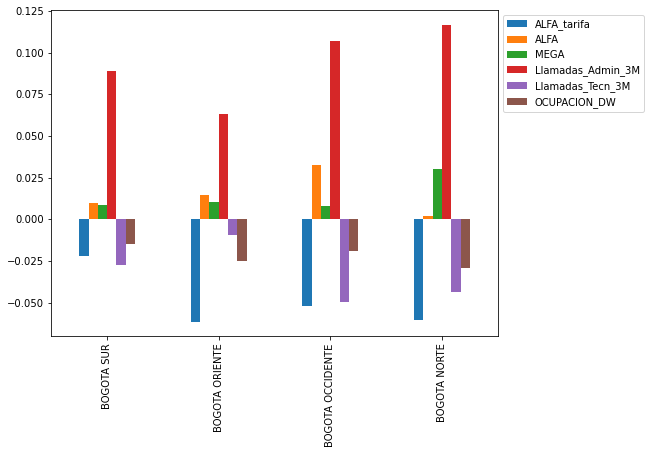

In [134]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [135]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
NACIONAL,-0.019869,0.013014,0.024617,0.086559,-0.037464,-0.025871
REGION OCCIDENTE,0.000124,0.013613,0.039125,0.152896,-0.051991,-0.030697
REGION COSTA,-0.013526,0.021062,0.009325,0.077552,-0.014303,-0.041225
REGION ORIENTE,-0.007826,0.015116,0.008444,0.127970,-0.033728,-0.016287
REGION CENTRO,-0.054597,0.012978,0.018310,0.090612,-0.032129,-0.024375
REGION NOROCCIDENTE,-0.016039,0.012216,0.043006,0.094513,-0.014529,-0.023401
BOGOTA,-0.054829,0.012278,0.018742,0.090708,-0.032682,-0.024550
CALI,-0.027899,0.009053,0.055817,0.180420,-0.061227,-0.033308
MEDELLIN,-0.022779,0.016219,0.044894,0.098422,0.013805,-0.028516
BARRANQUILLA,-0.012785,0.009457,0.018637,0.072143,-0.014552,-0.041439


### Analisis Temporal

In [136]:
"""
for reg in sectoresBog:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)
"""

"\nfor reg in sectoresBog:\n    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]\n    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])\n    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)\n    df_coef_T=df_coef.T\n    df_coef_T.pop('const')\n    df_coef_T=df_coef_T[1:]\n    df_coef_T['CATEGORIA']=reg\n    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)\n"

In [137]:
DataSetEntregable_totales_temp_reg

""


In [138]:
### Guardar Archivo

In [139]:
#DataSetEntregable_totales_reg.to_csv('RegresionesAgrupadas_14Dic.csv',sep=';')

In [140]:
#DataSetEntregable_totales_temp_reg.to_csv('RegresionesTemporales_14Dic.csv',sep=';')

    ## Nodos 

In [141]:
#NodosBog=data[data['CIUDAD']=='BOGOTA']['COD_NODO'].unique()
NodosBog=data['COD_NODO'].unique()

In [142]:
len(NodosBog)

6995

In [143]:
data_reg_nor

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW,ind_churn,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
COD_NODO,,,,,,,,,,,,,
B1Z,0.599182,0.217824,1.000000,0.123459,0.776008,0.423575,1.000000,0.100042,REGION OCCIDENTE,CALI,CALI CENTRO,CALI,CALI CENTRO DISTRITO 6
RO4,0.600295,0.446469,0.398147,0.590382,0.544745,0.594185,0.819374,0.030211,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
KRI,0.759086,0.258304,0.454957,0.303539,0.474160,0.291602,0.421243,0.064238,REGION ORIENTE,CUNMENAL,META,VILLAVICENCIO,VILLAVICENCIO NORTE
RO33D,0.439091,0.635341,0.635000,0.551888,0.520170,0.535537,0.581488,0.000000,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
330031,0.471026,0.770679,1.000000,0.375563,1.000000,1.000000,0.442799,0.000000,REGION CENTRO,BOGOTA SUR,ALSACIA,BOGOTA,GALERIAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
S04,0.636143,0.731374,0.492593,0.800422,0.593974,0.356450,0.394294,0.124967,REGION CENTRO,BOGOTA NORTE,MAZUREN,BOGOTA,SUBA RINCON
ACB,0.326805,0.646864,0.914474,0.399975,0.314139,0.286514,0.634300,0.000000,REGION ORIENTE,SANBOY,BUCARAMANGA-METROPOLITANA,BUCARAMANGA,DISTRITO BGA 1
GD3,0.520465,0.323316,0.224072,0.693878,0.789643,0.589152,0.503363,0.223265,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 4


In [144]:
data_reg_nor[data_reg_nor.index=='RO4']

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW,ind_churn,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
COD_NODO,,,,,,,,,,,,,
RO4,0.600295,0.446469,0.398147,0.590382,0.544745,0.594185,0.819374,0.030211,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.250921,0.720089,0.348559,1.000000,0.332639,0.354276,0.692663,0.086357,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.490298,0.668530,0.358662,0.968331,0.327044,0.371373,0.679892,0.028786,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.631055,0.834361,0.492993,0.912465,0.488596,0.501492,0.798502,0.058679,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.607203,0.561975,0.411698,0.721558,0.701679,0.724916,0.937574,0.060124,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3
RO4,0.335105,0.760741,0.327308,1.000000,0.403821,0.369892,0.661589,0.120843,REGION COSTA,COSTA SUR,BARRANQUILLA 2,BARRANQUILLA,BARRANQUILLA 2 DISTRITO 3


In [145]:
dic_resultados_NodosBogota={}
for reg in NodosBog:
    print(reg)
    dic_aux={}    
    #data_aux=data_reg_nor[data_reg_nor['COD_NODO']==reg] 
    data_aux=data_reg_nor[data_reg_nor.index==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_NodosBogota[reg]=dic_aux

B1Z
RO4
KRI
RO33D
330031
GIA
1601
R4C
CLD
ARC
SH31
SX6
HM11
JGI4D
GEG
5101


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


ST3
CN2
2GR
3AA012
ONZ2D
G4V
3C1022
CZP
PRZ
2BI
DDO
13A1
GO2
AF1
5AN014
EO4
GVC
D1O
ET2
5A5013
N0H
61013D
FGH
J1P
D1G
0CT
COL
LF12D
50B4D
LSM3D
8A4011
JSA
BER
TRN
65A1
MTO12D
FSE
TFZ
N2U
TOS
1TE
5B4022
LNL
SF41
O2G
CU6
PBL
TB53D
LGU1
2VP
VPA
5FD
3VU
UL2
NMR
VER23B
S042D
VRV
1VA1
PQI
G3A
7UT
CZ1
TB34D
S08
JD9
2F2013
2C2013
1LG
QUT
CEE
MSI
MUZ1
EV11
41A
JGI3D
3EP1
AFU
5CA014
GVO
C021
VF1
P2O
QO2
PVE
SLT
BG2
FV24D
TB52D
AMB3D
OVN
AP11
LTT
BVI
15A12M
6OS
FRC2
57013M
A3C
PL4
1SV3D
4902
SVP
JQO
ORA
LTJ
JN24D
BJ2
QR21
DAA
FN6
OTB
AB3
DRE
EBC
AVR
MTO14D
5A2012
T5P
3CT
1EN
8C4023
TAY
53C11M
2DI
TCH1
54F3D
ZUL
ELR
2AB
C0532D
3SA
E5Z
LLS
SJA3D
5B3013
8A5011
6MT
ED1
56C
6DD
NC43D
UAD
5C3013
AAG
MU6
GA5
NIG
5C7014
NU1
LAD13D
MON32D
NNT
EF5
39E
BY1
ANA
MHC


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


2ZN
1B8011
2A0014
35A
NVV
UU1
15B
GGR
460012
40D3D
50B23D
48A
A9P
LAG
JS5
AL35
2A0023
N3H
SK1
ODE
VLL
UD6
SFE
3AZ
NI4
3RG
52A
L2N
CT3
6RR
P2E1
TSB
RDC4D
N1Z1
CAH
TLU
VA23D
MIL
CUI1
BNB
SAL1
RIV
OIR
F1P2D
ON4
KH21
4A8013
2MU
2RU
PRI2D
8C0012
NRO
B1I4D
BNI
LTZ4D
LEV
CHG
VT2
34A
35A4D
1A4021
2B3032
4TE
9AA3
BSD
E4I
TC6
37B1
NN1
SEU
BF2
13011M
3B8014
3A2011
GA12
LOF
SN114D
5DB
VV9
JY2
PRN
4VD
GSD
4HB
JS3
MVG
CAE
1HA
1UM
7BZ
T5Y
RGF
SF512D
3TG
C372
VED
1HP
LOG
AF22
4SJ
G2B
8B42D
C8A
9UV
8A22
5B0022
L6M
ILI
ET1
5AL012
MDR1
MON2
COS2
VN2
PTR
PBU
CZL
LM21
CR0
3A4024
PRL
CJO
ROI
2CT
T1N
CBE
SM5
OG1
S4C
1A3011
TOZ
3AE012
CIM
AL324D
3A2012
DCA
SJR
9GR
3824B
REL1
5AJ012
CU5
S3Y
RBC
T3C
A3H1
PSI
CR1
TMO14D
IIC
CV3
VG21
51E
CQ0
TA2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


2BC
V26
N8H
9AI
CO6
SZS
FOR
MBQ
3C1023
HKD
BCH1
VLR
AS24A
PUE
NY1
1VS
D0R
4B8011
C0834D
VCF
SON14D
PS3
C2I
G2N
JIO
BCC
CF2
DM1
3B5023
5A5021
10H
52I
MP12D
CP1
C4I
BGT
3B5022
UB5
TRL
5C6013
HCD
PEY
5C4011
UG2
I2S2D
BYR
PC2
PPN
JO3
ZI3
NGM
IVA
39D
VMI
SF514D
V3S
12B2
TB44D
TN31
BHA1
5B7023
DVI2D
PDH
ATV
GI2
3EM
J2G
LOB4D
VHA2
NZM
2AF
DC23D
GOL
CIP
PZP
P8A
LOI
MO1
B1G
5C5023
CD112D
LCT
RMB
BAL1
C89
A6M
1RI
LU3
2D4014
2C4012
FN3
TDC
FBE
GB2
NFL
BU2
CH43D
50C3D
BB1
FB1
2C3024
BLU
02S
4A5011
SNL
A2S
CBE1
GCZ
2RG
VRA
TDD
50B3D
45A
NAE
ABM
42C2D
CTL
1PS
S1R
41C4
3AN
ACS3D
MLE2D
EF51
CCN
3AE013
F1M
TJC
6RG
CK4
F2R
0LM
6SA
G4Y
7VS
CS24D
DM2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


AM2
52B
SS5
A2F
2F0013
NF3
CN3
1BC022
SON12D
53D2
51D3D
EDN
S043D
UAT
VD12D
S202D
KM3
8AB014
EZ1
V2I
9A51
LMZ
2UD
NBN
MLZ1
LIL
AH12D
BCH
PCB
SY2
66062D
1DB
HSD
5AK011
LD9
PIO4
NR6
3UD
16B2D
PON2
SX5
8B5012
8A7022
ISA14D
2C0013
MOR3D
A1C
PG4
ST214D
E1E
54C
NVN
CAD3D
SRA
7A2
RGE
MV1
SAT2
LES
ECZ
AKA
AVC
MD1
LM33A
CRI2D
RMO
13T
FMA
POE
ALQ
SS3
CNT
T1C
CPU
C1U
2C2014
PRV1
BC3
2C9
OSS
JGI2D
CBE32D
HG1
V1O
T8Y
ARA
3A1012
SNS
S082
5AL011
0BZ
CD12
YMA
12A
NCR
BLP
15013D
IRV
CIE12D
GMC
UNT
BMM
AAL
BI3
AQM
4402
2B3023
SM7
ZI4
JDI
L1P3D
SQ5
Z3C
4VE
6HB
SL4
5OS
2C92D
BTA
21A
ZI1
4A6013
1CH
AEA
4D0012
C6Y
3SM13D
RCR
474D
SR1
53C
C17
7GR
SON13D


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


PIU
CMA
QP2
LRO23D
1PE2D
4A6014
4D3022
3C1021
32A021
8C7011
34D1
VBS
TU3
C5M
4B0011
TB4
D2L
1A6011
LOT
PAM3D
3BZ
BIT
SPP
LY1
L7M
2DO3D
FLD
V4R
BSP
PCG
34D2D
FER2D
GU3
QSA
3231M
MU4
16B4D
SFP
SUR1
RG7
TOB1
COE
3RT
S1C
VIC22D
TB54D
JOC
BSC14D
N3Z
5NG
RGB
PD1
4B4011
RB11
BI23D
42E4D
HCT
AUC
7G3
SF4
HOL
BH1
JBE
53B12D
M0G
A7M
CDT
RTO3D
MOC
1B3014
AGB
1BB011
5AM024
S2U
MC5
5B3011
EEA
C5C
BAV
TLB1
LTO
3PP
AUA
8B5021
ACO
GUL
44A4D
HC1
300011
C2012D
IN6
GA13
R1V
LGE
460022
NH4
ZAR
RAZ
7MT
TN81
QTL
34013D
ZP2
NSL
8A0012
GA54D
RRT
TEO
JJZ
5A2011
T4L
39B11B
6GR
A1U
58A
EXA
VPL
5B4023
4A0011
C072
1OB
VZ3
V5R
9AA
BSM4D
MER1
ONZ3D
TA1
I2N
BG3
5AB011
1B4022
JN14D
VCM2D
SN13D
5A0023
51F
GA31
A7P
1B4011
BRO
2B6021
LVI2
2OL3B
13023D
D3C
AS22A
FO2
BZU
3802
HP2
DR3
6LP
P1A
AL323D
MLI
3SP
40E3D
1GE
VVU


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


A1L
SV8
9AG
SF2
SSR
MRB
5AM023
HBA
2IO
TB3
BB6
8B2
37A1
FA5
JZ1
TS1
TP5
54A
VA21
C50
2CF012
61014D
GFS
VR11
UN5
JE1
NF1
DNE
8UT
EDG
VB1
VRT4D
4C7014
RS2
LY6
IUM
SC32D
LS2
1BQ1
B1N1
BAL
BQ1
SML2
TTY
3SM12D
UU2
12A3D
2LD
AVV
C051
SNA
VM113D
7G1
CHD
A2Y
15022D
4D2011
BKS
DNO
C083D
DAY
FL31
2D3014
PC1
34A2
V27
O1L
FB2
2QU
OGU
5A5012
3C0013
NLO
TSO
UT4
C51
IR1
5AD022
N2H
MA12
BHL
C171
BRT
3CG
UN3
4A1023
A3T
GM2
JY1
C0523D
32V


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


C2Z
4A9014
49022D
PTE
TVI3B
LCB
EJN
T2T
BMA
HH7
3B2023
8C6011
JGE
PEB
ZVT
BUV
8D3012
BZ2
T9A3D
AJZ1
4D2014
OBA
VEE
2C0014
BLC
G1Y
V4C
CMO21
51B3D
6606
1OZ
1SV2D
KP4
PNV
J3P
PQ32D
BNV
GB3
MAU
MSS4D
C0313D
LCR14D
9AC
DN14D
C0312D
C65
1BC021
5C9011
4IU
P2C
LF7
46A032
BMT
5C7012
GRN
NII
7201
PC6
6001
5AN012
VID
1A2022
OPI
C2L
0VS
C081
COV
1LU
TU1
SIL
MNE
3HP
MC3
2SR
54F2D
CA3
CPQ
PV22D
1EG
2C3022
NQ1
A5U2D
PON1
SF51
AEH
4ET
4C6011
T5C
I4L
48B
PW6
ONA
IA1
AUE
LVI
COS
CIJ
MD2
TB6
BQD
NY3
56D12D
COO
VIP1
GL21
TSF
12T
CCA
SJO14D


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


46C011
N1H
AZS
CGS
I2R
ALT
8RU
POR
B2G
E1I
GN44D
QG1
8EG
F5M
UEV
ATN
BOC
2AL
KH12
JO5
LR9
HED1
UAL
2AU
ANS1
OLM
DBE
2F1023
RUB
JQI
1BA011
5A0022
ON3
RTA2D
OD44D
MIR1
SAU13D
2BQ2
1BC013
46C014
FLO11
NZ1
50A4D
VRO
TT4
BP3
52D2D
32C012
65A22D
BDJ
ISA4D
CNS
BAA3D
MBO
46A033
BL5
C0434D
3B8013
VV8
NZ2
PCV3B
ZE1
5AM012
V3E
PLS
2VA
3EP3
ENC44D
PRQ2
EC1
OA1
3MV
GT1
TL4
NA2
SGZ2
7RU
8A3013
1ZA
RN3
CHM1
743D
JVE
CZ13
V12
F1G
TMO1
MD14D
BB4
0VL
3HR
11C
1TI1
2F1024
ENC42D
52H
B1F
TZ1
5AE014
G2T2D
MOR2D
VP4
CRS1
PMO
D2U
MBI
4C3012
722D
S4H
IU34D
LTL
FYM
MI8
9AA1
SAL
GVE
NJG
FNC
UCI3D
SSD
LIV
DB2
AV1
L3M
PRI1
2BE
J11
48B2D
BNR
2EV
C6O
2EI
JA1
C79
LOB3D
FDI
39A3D
ALE3D
1SY
S06
MOA
2IS1
V15
VA22D
VIC12D
P2C1
TIO
33A1
RDT
CRP3
42D
31A021


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


PI2
N4O
SOS1
9A9
SJA14D
MS2
2AD
SNJ
S1O
330022
PLB
542D
5A7021
4IZ
2DB
NNR
LTZ2D
SUM4D
T4R
VRS1
LR7
C54
C251
1B2032
TC3
VIT
SNH
GVA
2RT
0RV
SD3
TU5
8A0014
CAR1
CS2
5C6011


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


ZVS
N1U
9AE
16A
FGR
MV2
8A5014
QSP
5BZ
SON4D
54E3D
DJ2
3TC
C2U
GV3
R5C1
BOC1
5VD
C2C
C0833D
JGI
LM34A
SDY
AOC1
DSR
NQ4
MNU4D
CU1
REM
KH3
TS6
LR8
2B6023
VOC
3EB
UES
V30
M3V
CH613D
BS2
S033D
PCI
51B4D
B1H
CH42D
CMC
1AT1
LOE
U2M
OAG
403D
522D
SE1
NEO
PDT
IP2
2F1022
4A5012
VO5
HGI
32A014
PB1
C1L
DVC3D
ADV
CA11
BRL
5B0011
T6C
C67
39C3D
6DB
PSE
LF13D
393D
BH2
3IG
GNY
DGL
INE
SE13D
XO5
N4C
DN13D
UVL
LMG
53F
R5C
PRA
5AH013
NDA
RAJ
QLA
TL2
8C2022
BV1
V1T
SML1
2C3011
3A5033
CLP
S0C
39E4
CR2
EMA
2C1021
DC3
CLG
SAG
LIE
RB1
V3S2D
A9D
6501
6601
VL13
NC44D
1BZ
BJ1
5AD014
51D
RMS
OGO
3RB
3J1
8AA4D
ANU
BQG
LD6
VRS14D
1IO
VER11
CH1
ABB
41C3
NJO
NPB
1CM
1VU
YM2
GO21
4EG
53B13D
MAN
MZC
BY2
52F23D
GVM
AS11
42E
6101
CX6
VM213B
AO1
4TI
DR4
C01
3OL
S204D
ORO
TBAB20
DAL4D
A1Z
VCA
JAZ2D
BAU
S2M
5A9012
1SM1
2EP3D
Y2E
LN4
1CT
ERR
30A012
8A9013
1SP
46B013
LOH
SLX
BBT
NNM


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


AS42
GPL
57022D
RO3
4C6014
HIL
MB2
NP31
A5P
SRO
QR1
RY4
J3N
1QP
EMT
1DM
JS1
DEV
3SM14D
2B3011
MON33D
ZB5
S214D
C773D
CBE3
2A0012
2A1013
LB1
7401
37B
AKS
LN1
GRS
KP1
Z4P
1B2022
EC4
A5L
2VG
G1C
GFM
VDO
40B
4GR
SC9
VEO
R3P
EV1
MMD
ME3
C082
4C5013
AL12A
SMX
VX8
1TG
AMU
102D
2SP
41D
1B2012
ASJ
CF6
56D13D
3UV
MIJ
PZB
LRO3D
4B2013
40D2D
EIR
GDA1
52C3D
300022
TB82D
4D0031
T1Y
JO22D
7OO
9A94D
TNM
3QU
NVL
MOR
5VF
RDV
VIP4D
IVB
1FC
POL
2AN
473D
QR3
3B7012
2SM
MED
49A2
FLO1
QBA
VJ34D
LRE
EXT23D
LLU4D
2B3033
LE1
GLC1
SM6
5A7034
2D2013
VRI
8QS
B1I2D
4B8014
LCR2D
BED
AGT
AU8
RMV
CES
MNN
9VS
I1R
AL31
PNL
JCL
VCS
CE1
1B2033
0SM
SM9
HO3
54E2D
4D1024
AS23A
VCM3D
2OS
GY1
MU3
STE4D
PRG
GV2
MLP
5B7024
FT1
52H3D
TB42D
PAJ
2LM
BAG
TZ13
8A5012
ALN4D
JB2
15012D
BIB
SU11
3PP2D
TRT


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


0DD
46A011
C5E
P1C4D
2C5012
4A0024
LU2
53B
51D4D
AJ4
SJ3
5AJ013
AA6
DVN
1PE
3B1023
MOB
FC4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


1A6021
DL1
4D3023
GUS
LCR
PF21
POO
RTA
CVV
6AN
J2E
SX1
BT2
1A5013
FA62D
MC4
F3R
4D1013
47A
VJI
SJO3D
GEA
C071
SK2
GN42D
TN11
SJO12D
BT5
39D13D
MS3
IU3
GO12
HO5
BR83D
VV23D
VN7
OVM
6RU
VD1
GDA
JGD
LMA
CCI
BG12D
41B2D
MC1
UME
VF23D
GA33
1B4031
DP9
16A1
BOT
B2I
JD1
GUC
FN5
VG14D
3PM
5RG
TOB
FS1
S4R
CF3
42A2D
IPV
P034D
F4I
5DL
PBL1
LY5
TES
KM13B
44A13D
QV4
AHI
VSR
UM2
C56
GVP
VSE1
3B3014
CN1
5CC011
MBC
7VT
NRI
8C4022
OAO
MI4
SE2
38014D
4CC
VRT2D
SX2
JD61
7705
SN113D
NI5
A7D
SIM
3BE011
CZ5
1A1012
TVA
RMN4D
9LM
40E2D
LFF
SAV
C0114D


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


L5M
T4I
8D0024
VI5
H1R
443B
4B0012
3GN
5IZ
VAM1
E4Z
BPT
CF13B
SVI
5CH
PT7
TS2
DBB
AR53
SDU
BJ12D
5B7031
S07
15B1
RMI
VN3
C20
FRA
TRC
VG112D
9AB
VRT
BNT
RDC3D
PZA
ST14D
F4D
TEN
HG3
IAR
PPL
UCS
PV4
NBA
4B61
39A2
2C8023
SH1
2OZ
UG1
44A2
1B2021
C772D
HB3
8B72A
UFT
52A13M
9A5
CL21
45B1
4A1024
JS4
SAL3D
ACB
QRP
PZL
1A5012
ZAT
C8T
AC3
RZR
ECI
IM2
0CO
CH5
5AZ
5A0011
BP2
SRR
D1C
C11
LPT
POA
RL3
T3I
ETO
BRP
FGA
VID1
BAA1
3NO
V2V
MTF
ST13D
UGA
STA
DO2
1IE
2LO
9LN
2CB1
JO2
AR1
1CG
2UA
DMP
HI1
3SC
NC4
OQ2
2C1014
15C3
CMO1
S0621
LPR
PTB
PCS
QSP1
7G4
LGB
53B2
VRS13D
T3J
BAM
SDT
LIC
CUZ
3SM3D
INT
SX7
MRT
GTM
TMO
C27
TNO
JMZ
8C6013
AJZ
AL36
SC4
AU6
UE2
VA22
NR2
NAV
11A1
ZR2
SY5
LDT
ST213D
CRS
FN2
YC1
EIA
52F2D
8A8013
VO4
15B3
3MT
15AA
FST
PH1
PUM
50C1
C2U3D
MZ21
B3S
C58
C02
RLC
6TC1
ERO
PIO1
VMT
ASU3
MB1
2C6023
C86
IRE
50B22D
5VU
B5N
F2T
SL3
3AF
NG2
CKJ
DL2
7OS
L12
LIG
R1O
3MI
NO2
PFT
SDM
2SB
8A9011
PSV
S5V
SAV3D
C71
ECV3B
PB5
CCP
GIL2D
LAD1
GIL
FCC
S4S
CTM
NO1V
PDM
CX4
VIP3D
MZG
1LD
VMN1
LOO
502D
BVV


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


NP2
4C0013
SIS3
GA522D
CV21
SJO2D
HM21
VVG
51B
C63
39B14B
IBT
3SR
RSN
B2Q
LBL
VG24
ME6
LF1
D4C
2TC
ALE2
2QO
R5M
35C14D
CIE1
ENA
EC5
FLO
BPB
ALC
QDC
2C93D
2EM
SIS1
EL1
TN41
9DL
1B9011
3GR
TPL
52F3D
57012M
PBC
S024D
CD113D
8D1024
S081
BDF
5B7022
Y3E


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


MP3
BRY
SNY
ICL
PR2
2C7023
S011
ZAR1
CQA
1TY
AZD
R1C
SII
QD2
GN413D
1UV
4D3012
42C13D
5C4012
BOB1
8A0011
TEM
613D
2B1013
5AK013
UL3
PL214D
SCP
F3I
LFL
2B3012
ISA23D
MO4
1MO
AMA
PR3
8A7023
P1Q
2QP
CGN
4MV
GB5
BGA
1B2023
SI2
50C
5C2013
PEQ
TO6
AU1
A2L
AEJ
RCV
8D2012
H3R
2LS
VLH
PDS
PB4
MLL
LSM2D
4A8014
VNC
EE2
4HP
GH1
1MI
NAJ
R3G
9VT
MIE
T5V
EUR2D
C0824D
QUT1
C60
454A
BDC
T2L
AL14A
TEB
2B1022
OL3
1302
UL7
DOR1
MLE
8C4024
2D6014
SFP1
40E
L0L
AX4
SAY
4403
CLH
IU33D
L0M
50C13M
AL3
GM1
B1S
JO24D
AYC
VRT3D
A8P
MHB
3EP
YC4
12B2D
ESB
QR4
GA114D
SO2
BG113D
32A022
2FT
5AF033
3EG
LUI
ACZ
IU7
R4G
56B4D
CMO11
DVC2D
YG3
13013M
DL11
1LM
SMA
FER14D
0GR
4DD
FE2
GTR
BOR
RG3
12D
1BC011
NH9
112D
SGO
453A
SC74D
48A4D
8A7021
33A013
SL2
2F0014
GA43
GC2
1A5022
5A1012
2C7021
F5I
39E1
AQN1
PFO
1PN
UDS
URN
CDW
ROR
JCP
C2M
RQ1
1A0011
PGR
MIL2
1VM
5CA013
SC7
7801
5CD012
QR14D
BP11
4A3013
NO1
URR
30A014
48B3D
HKY
1B5014
FA2
2EL
RO5
2EG
CR7
MON
C52
4802
SV4
TUL
C3E
MLZ
BCZ
5AI021
VC1
DEA
PQL
35C13D
YG4
11M
MYC
VM112D

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


1B6011
B4G
JER
GA71
AUD
330034
B3R
ZE2
SCW
ZF14D
RTC
VDD
5B1012
3SM4D
C041
2IE
IA2
8A4012
FZ2
FBM
FY4
VMNA
GRO
VC2
CMV
CG1
ENU
DB1
472D
PED
PG5
NFE
PB3
5AG013
3DD1
RSC
S5S
CIF
NF8
2GT
CTY
MRC
FRG3D
PBD
AEB
VO2
46A023
56C22M
R2C
GQ3
DOR2D
GLC2
GB1
PZ13D
JNO
8C3023
GU4
QE1
GEO
3C2021
1SV
0RG
6SF
VVB
2SY
MAL
R3C
41B13D
OC6
8OO
ATQ
4VU1
8TC
R9G
UY1
CO4
AIA
QU9
LCR4D
INZ
2HR
EE1
COS1
4D0033
F7M
E2O4D
BSC
52F1
MCD
CRP1
50D
S5I
IP3
2D5011
5AI012
PVC3D
35A2D
30A011
8D2011
2DD
TN71
4D0014
LMA1
LS1
42E3D
BG1
KH2
UL5
FU4
34A13D
SNX
2LG
S2K
TS7
2C3023
I2S3D
MCH
LG4
DD4
SJ2
1QS
52F22D
EDT
AH11
TSV
PGE
7DD
BSZ
3B1024
NH7
2QS
DC5
CJ11
TN63D
MRI
744D
TMI
ON1
C075
CPD
BRG
SO4
34E1
TND
C3M
0SA
OS2
FES
50B1
15023D
2D1013
I3O
DM4
51C1
SBN
2AT
1TS
BTB
AZL
JGV
SIS4
QJ1
LRO13D
BV2
330021
LTZ14D
C00
5NO
LVS
SJO
2BQ
UB7
CP2
ITM
C091
5B4024
8A7024
GCA
GUB
2MP
YC2
N2B
1ET
2FC
C292D
R2Y
3B1011
UD7
1B8014
PDI
R1C2D
2C6053
QR42
C073
TL1
LRO2
TEL
C33
2B0011
CRK
3BE014
AU2
QG4
MTO13D
PVR
IQT
AYG
TB8
ICI
IMA
VG243D
PC

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


RZO
ZB1
ANG1
5A7013
RG9
BSD4A
VEF
1EB1
53C4D
8B3021
39C
C023
54A1
VRI2D
5A7011
3CP
ICH1
ARZ
RG8
8C4021
DC1
SUS
C1M
AZZ
BGL
AD3
VJ33D
NP3
VLU
3823B
PDS1
C083
5001
RVE
VVA
NLS
SU2
LET
56C01B
PV11
LM22
HM1
MER
CH612D
MP41
SJ8
1SJ
FTB3D
C4E
TRI
BT3
A1H
ANS
2C6042
ISA2
SF42D
TC1
AUF
CV43
4B3012
4LG
BQN
ZG4
CPK
8D6023
LM1
4C2013
RBL
FV12D
IRN
BNC
GTP
GQ4
BT1
OQ1
TT3
CHO
JS7
CF5
NZA
C3R
5AI023
MAN2
51C
VF24D
M1U
RTO4D
2CH
8C9013
SRN
5C6021
N6H
1JP
1FT
V9C
SF5
CIE14D
SRG
XS3
VXN
15A11M
J10
EPL
4801
CGS4D
SC41M
S044D
31A011
SME
3RU
OPO1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


4B14D
CVO
E2T
VDT
2A4013
SO5
RBK
FY5
RLN
OC3
1GS
HA1
GL12D
ANJ
ADM
GO11
NOP
TOT
KE1
CC5
S1M
MFC
48A3D
C084D
DD1
5A0012
GA7
9FD
1B5012
RVL
ONS
MTO
A0A
C53
SX3
RDA
VRI4D
JE4
T1I
2D6012
SH21
V6D
MML
CBT
2DP
RAF
MHR
PB2
C62
PO3
TU4
BOQ
C5O
V1C
TB61
LBE
RTL
GLC
3A3012
PSM
NAV2D
REP1
3GE
C87
TSJ
MUC
P4M


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


RBD
2A2011
14A12D
AC4
TH7
5B6014
EJE
BAV3D
57033D
PJS
C08
SD1
3AU1
5C0021
TAQ
4PA
46B023
41A2D
N2V
BCD
VDA
RGH1
VO1
RMN
1A0012
SMU
0AR
S2H
LBA
2OE
FY2
2TV
JO4
C92
A2V
P4A
4NJ
7SC
ROO
JD8
SY6
MT3
MJY
TN2
1BA013
JD2
1A5011
G1A
9AA14M
LMG2
C3U
9AH3D
15C4
TH5
VSO
FTE
9AD2D
MFA
2C6032
T4J
S061
JUR
IRA
TMO13D
2A1021
PMM
10M
GL23
QUA
TN6


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


AND
FL1
5A1011
KM2
BR9
BSC13D
4VL
VX4
C30
EXT
S3U
AIC
39D4D
5B6024
JSS1
ST0
5B3023
VJ12D
SEV
S1Z
4B5013
VHA1
MVX
NJR
4SF
RUE
DS3
PA1
52C4D
1AB
VTS
TBB
JSI
3EP2
6GE
RN4
I3T
AU4
SU1
4VV
4D3011
G3Y
ST12D
C4S
NRA
BLT1
C64
5703
5CE014
GFH
ILO
VPS
1LP
ASU
SML3
CRP
FA63D
LGA
LF9
5UV
MSL3D
FC2
SN12D
41B14D
ARJ
GUI
2BQ1
C26
1A6013
1SV4D
BC2
N1R
CRA
CLA2D
3VP
1B6012
1PP
RC3
KH31
LAE
2B2014
R1G
ZAR4
FRD1
ZT2
PCD
C294D
UY4
RLB
L1I
TS5
FI3
C59
ELO
AQE
P2D2D
6605
L2P
8C7012
5CB012
8A4013
54A2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


QDP
LSL
38C2D
PPU
C1G
PRI12D
IAI
34E
2IS12D
NOA
5VP
VEP
VSP
VY11
TLA1
FT4
AL37
AVE
48C2D
VRI1
8DB
GN21
CI12D
EE4
DJ3
6603
TDM
UV4
4VU
39I2D
A6U
57023D
T6T
NH1
MVC
SC34D
3SM1
AH21
IZS
VHA
HM2
AX5
5AC011
U1N
5A5034
JAZ4D
5701
4AS
ENL
2C3013
2SM1
MY2
TC4
QV5
CRM
BAV2D
BAA2D
MEB
UB3
BHT
C74
CRI4D
NF5
MD21
CV4
LF3
LBE1
JDS
2LP
5B4013
BV5
NOD
F1I
5AE011
45B2
VIP
IUR
TR6
T4P
AU3
DR6
SFB
2EN1
FDN
4C6013
3822B
3B2021
1B3011
3701
C6S
TC5
SE24D
6HP
VG23
S05
5AM011
SOB
OC1
PG2
572D
TVZ
3IE
4UV
SQ4
UMA
2C7022
NQ2
3C3014
F3N
VE2
GYC
BAA
6602
RLO1
DL21
EPJ
3PP4D
SAV2D
BRR
ST1
UB1
KPC
C43
DEC
PRI13D
EZ6
RPS
CT4
VMY1
LTN
NAV4D
FL22
F2D
M3P
5B0012
TRT1
SGE
PAD
1AT
ZR23B
2C1013
SB2
2EN
TIM2
32C021
CH71
6SB
ENC3
OTU
1AZ
CPC
L10
CFR2D
PHD
OVC
LFV
ROL
UGN
CAZ
MIN3
RG0
4LP
LSO
MAA
LU1
50C4D
DN1
UD4
LBT
BOB2
GA1
MP1
GRB
7DB
4AF
53E
4B5011
BHU
MTC
1EN4D
SJ1
0DB
9A2
LH51
39C4D
C3AA
FL12D
R2P
IMU
UL4
35C
C1Z
FRE
1A4014
GUL3D
TLC
PRS
39D2D
TUP
PRS1
LTZ1
LTZ12D
14A14D
34A14D
37043D
T1P
33A4
TIA
P7S
EDI
50B24D


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


PYB
R1I
2F0011
CI4
2NC
STZ
FOD
NSN
C2K
SN11
UB4
PV23D
P6M
PST
GAL
FG1
BN3
CRP5
S203D
CBA
MNS
ZR1
SGC
RGA
C082D
1AP
LUC
LR2
CJS
E2Z
R1T
BHS
35V
52F
MUN
CG2
1SS
VM114D
S051
BRN
7DL
5AA011
1RL1
SM0
SY1
14A
FTL
GEN
F8I
C084
C1A2
AUI
D1U
ALI
O2E
EON
P1S
RZ2
AU9
V4D
2A2012
JLC
R2G
VSU
3BB013
53C3D
TRE2D
2D3011
UMB
NP9
2B7013
SDB
8AE014
A3E
VNU
FRD
65A23D
C1A13D
1B1011
AP2
3CA
45A31B
TS3
42A3D
FL32
4A0012
STR
C0314D
TUB
AEU
AMX
1A4011
S03
L4M
BAA12D
TCC
CH2
4DL
C85
RNO
GD6
CRS2D
A1T
MUE
BHZ
SPD
F10
P5M
STE2D
BP6
12B4D
VJ2A
C3L
OES
PC3
CO5
9PL
8D2033
SV2
8B3D
BOB
VV24D
BLB
ST2
A1V
ZAR3
8C3032
EPZ
SC72D
VP3
2JS
C0822D
LSV
V1E
SSZ
C0823D
F2P
EOZ
B1I
E2O
1B5022
5C3014
5CC013
3B5014
PZR
UD2
3SM
SK6
O3G
FON
ENC2
AH1
1EB
LAI
JAR
LO4
A9U
SJE
37B3
BP1
PIO2
MAR
RRN
1DN
12E
TA4
NSE
URR2D
TTD
SE11
2EP2D
QR44
T1T
DAN
41E
8C9012
9OO
JB3
PBB
IBA
AE4
AA1
RGC
EMC4D
LRI
FU3
RAM
VLL2
SGZ1
MNU2D
RL1
BIH
1MQ
K2M
GOR


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


ZR6
13012M
SJB
LRS
GA4
4C4012
RBP
4B1011
VTZ
2VD
25M
AGS1
NUO
T5T
C3I
NE12
8D5
CF4
NFT
ALB
GRZ
VEA
VI2
FV22D
I1N
TVC
SNN
TMR
FRG
V24
AQN
SDO
Z3P
4QP
8VT
3SJ
D11
C69
8D2023
2B5014
1AS
J5E
51B2D
LLU
4C1011
SS1
ANG
CZS
C3A12D
DEL
P02
ZH21
CBC
SIS11
TMG
VRD
HB1
7A01
ARI
R2T
VMY2
JB1
8C2011
7706
C052D
5LM
5B0014
300023
ISA22D
PF22
HH6
LPS
L2I
5C0014
MVV
1A2021
VJ32D
P2F
5B4014
V271
CT2
TR8
GTM1
PLR
6RV
AD1
34C3
3BF013
GNC
TR1
4C2012
NA7
VT1
BOC3
5AF031
RLI
PLG
RIT
CUR
KDS
URA
SCM
EME
40D
FRC
LME
GU2
AM1
VL111
TB43D
RQU
TN1
52F2
3RL
1JS
5AN013
7202
BON1
IRA1
5CE011
VED2D
BCH12D
CQO
R1L
AS32
5AI011
R3J
NC3


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


ELI
VD14D
L2A
LH5
8002
1BV
SDN
MIN2
SEM1
ETU
SAA
1AC
1AF


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


4D1021
PL1
PRV3B
RES
6VD
F2Z
RAR1
VES1
2RR
BN1
3C2011
KNY
16B
UR111M
1RR
AGO1
LGU2
RE6
PEO
5TF
ILI1
2CV
G5C
VX1
2D0011
BDS
NAT
FVO
42D4D
5C6024
BCH2D
LNT
RV3
KTP
1NO
4D2024
S5H
MY3
SLS
BZ14D
5A9013
V3C
G2T
VV2
MD12D
8B4D
NF2
BON
SAU14D
MUZ
VJ1
UT2
A2E
3AO
O2O
6CO
ESL
LFO
S062
NGP
AGO
SJV
PA13D
37C
2TS
PV24D
FCN
R2S
BCA
11T
2VM
15A13M
RO1
1RB
HI2
SVA
SDQ
GA533D
RMA
SUP
QS2
MEL
UE3
EO5
N2R
1BC024
SM1
TC2
SIS24D
BDI
EDR
S21
TEJ
AL1
EEI
P033D
4AU
IU1
AMF
GRT
2TI
I3Z
EBC2D
39A1
ZON
N2A
1IN
JD6
PSD
6AF
2D1024
6002
T9Y
3B0033
FUL
B4S
6BZ
3A5013
BO1
42A
5A9014
UT5
C25
TN22D
4803


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


QR112D
3VS
TLN
14A1
S071
8C2013
SOL1
SEJ
42E2D
SEC
SJA2
TBQ
4B3022
4GN
8C7013
PF12
CY8
JAZ
JZO
VRP
59012D
V0D
SEV3D
IB3
3FR
PIB
PZ1
LE3
65A14D
SJC
T3P
QOO
COL1
2DM
2D6011
CS21
56C23M
PRR
SIS22D
SEP
ALE1
RR24D
41D1
1FV
2D2012
GEH
PEP12D


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


ASC
AG3
RVU
B2F
GA63D
AO3
3LN
A5R
SEV4D
DAL3D
CH6
ADR
8AL
3C2022
SJ6
6SU
UL6
CQE
AMG
SX4
5AF023
HH5
C4C
2BZ
RN1
AF21
ENC4
PAM
2BB
SNU
FVL
C39
C1S
VER2
D4D
BZ13D
BNA
A2D
LNB
DEB
SM8
330033
VI6
ESU
RNR
S1P1
N3C


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


FIA
3A6012
TJA
RA5
3FT
41A4D
IMD
GFE
9UT
DYC
SCI
2FV
S1U
EU5
2DL
5B1013
UCI2D
DO1
TB7
GT2
1EU
DSI
VMG
BON11
AG4
SJ4
VCZ
LLI
2XD
BIN
ALE2D
2C2022
PS2
4D0011
2NO
SC73D
2EZ
1DL
2DO2D
EUR
BF1
BAA4D
QSR
LUS
LF21
OTA
VCK
VD23D
MA1
5MT
RDO
3234M
300021
S06A
QR2
BY3
3HB
NE71
33A5
2DN3D
C9A
R5G
FOE
2AT1
SGB
3IZ
FB3
6604
53G
402D
1LO
C45
EC2
UTL
6CH
CJ13
5B0024
1101
SM4
NSE2D
EZ5
8B01
4404
3A5014
R2M
2A1022
15A1
DAZ
3MO
FY1
MRK
BB2
LTZ3D
MO2
1GR
53E14D
OFR
JOO
CJ12
ENE
HBB
4OL
1B1014
LRA
NP1
LA1
PAO
5A5022
563D
LAD12D
2C4011
GEC
G7C
2SA
P3R
LR1
R1M
5HB
V10
2B0012
QV3
DCI
LGZ1
MIR2
2C6041
CH44D
VIC24D
SE212D
3TS
33A
3CH
VN6
1BQ
CBE34D
LGD
D6R
SNE
39I
TGP
A3U
MYI
JE6
2SC
GER
JML
JN2
MLO
7EG
3EN1
CMP
5QS
VMH
VFO
YG1
MON3
8A62D
GBD
NVR
1B4023
GVT
4B5012
5B2014
2RL
EZ9
SJO4D
5502
UGA4D
3TU
O2O1
LN2
MIL13D
CTA
ATU
5A2021
D1S
4CT
53D1
2FE
L11
PRI14D
PV3


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


TNC
VAS
BG13D
JV2
5A5011
1IT
MCB
MQB
FID
2F2011
UZ2
FG2
FCS
ENT
IT7
9AD3D
VER
IPP
IK1
ECP
54F4D
1BQ12D
L1N
2C8011
MRL
N1V
MTI
EBL
EMV
A1E
OMD
F2R1
ASU13D
SRU
RTA1
524D
2D4013
UVU
QRG
I2Z
DCL
VES
KEY
11014D
OLE
AL2
P2D3D
FY3
JB4
N3R
4B2012
BBI
8C4014
BRS1
TEP
OTD
TFI
5B1011
SAU1
P1C
JE5
1BC014
BG14D
MB4
YM3
VX51
CLF
POD
3AH
NR4
46B021
VC7
C121
39F
GIL3D
2F2014
PAH
HH8
SK3
1IU
OMX
P1E
BRH
PLD
MLR1
CBE33D
1TN
6301
VBB
1GT
JCB1
P1E4D
UY2
VJD
CB12
12A2D
0EG
ESC
CBD
IPA
662D
EVA
AUS
5102
6AZ
3C2012
1A1011
54C4D
PBT
CAR3
AF23
BPN2
CK3
GD0
MOB1
BO11
F2I
AIR
DY2
CUI
FV1
QUC3D
HYR
I2S
CB0
GOA
T7Y
DPT
S6I
49024D
CA2
8B014D
7VF
MVR
7VD
5EV
MAY
YG2
OK2
C052
BL4
2IS2D
PLV
3LM
FB21
QUC2D
AE41
UA2
OP1
3MG
NF4
8A64D
5B3022
SRA23B
RBZ
A2R
11B
50A
MNC
NY2
JUE
JSS
56D
9AD4D
MUZ2
OL1
543D
8GR
PYR
GA62D
LM2
1OB3B
ADO12M
330011
DOB
DEP
LG1
6201
UO31
3901
JE7
N9H
IN1
KM1
PI1
P3O
2DO
TAF
BPO
XO3
BAA14D
TA3
E1T
15A
2C7011
MRM
KM4
AMB4D
BTQ
3A8012
3A3011
UB2
SV9
RSJ
C501
GCI
RAC
CUL
30A024
AJN
5C4014
PLY
RGD
34C

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


5AJ021
ACD
LDN
LG2
1B9021
GA52
BTC
C99
NDR
GEH1
6EG
PII
CRS4D
VM1
V3R
C691
8B74A
POA3D
5AM013
2IS3D
SFS
M2V
DD0
8VD
1BS
BQS
3AT
30A022
1ER
LUG
34A22D
RQ2
2NU
VIL
5AE024
PV42D
P1E3D
ST33D
57024D
LNC
4MT
JC1
38C
PZ14D
AAF
IDA
9A3
4PB
KP3
E2I
LI2
LFA
NMN
3B6022
VB2
HJC
1EV
VL1
TN51
8C2012
1RM
G3C
5AD031
FA4
MP4
VHO
4CM
8AE011
TB1
CRP2
2A1012
SFC
CU8
4RG
HRM
153B
LN5
O1B
CAR12D
CPA
URR4D
T2O
9SC
BB8
GUL2D
6DL


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


T3R
JE3
LGT
TN23D
SC3
REO
1VE
57032D
JOS
1001
BR53D
4JV
1EZ
8C5011
0VT
OPB
SO8
DRT
AS31
6UT
BAV11
5B3014
P1E2D
CIE
9A4D
CEO
RS4
EMC3D
AMD
MLR
R2I
PMJ
2PA
300024
40B12B
VBI
NLM
G2S
2C6033
3AE014
T1L
JAC
8C7014
CAR2
BAV4D
33A8
BN4
53E12D
5A7033
TN24D
5C2011
SFM
BCH4D
R2C3D
BA1
SQC
16B3D
RZ3
SEV2D
SON3D
LY3
J3P1
BRC
2C3021
E6Z
B3G
FC44D
YPS
54B2D
N5O
L1S
P4S
1TT
4GE
37V
1RU
PQ33D
CTE
INO
C13
VJ21
11C1
ADP
2PE
5DD
DTT
3BF012
RSO
PIV1
GA64D
BCM
5A5031
TLE
PQ34D
G0R
V1S
LRP
2C6051
PQ11
4B4013
4A9011
G3I
S3H
IB4
TOC
8C5013
UGA3D
PQ3
8A8011
BBB
LF412D
NPE
S2E
UGP
NMS
3VL
3SF
AP1
NC1
DN12D
6OO
SRM
LRT
U3A
VDP
C05
8D54D
VIC1
ODL
SK4
PPV
EV3
3SM2D
PL24D
ACS2D
RR23D
ME5
NCP
RVR
4C7011
LVA
VEI
YC3
6VL
BAA13D
VJ54D
EV2
PTC
CZL1
SA3
MRS
39E6
BA3
NZ12D
5JV
DDD
8001
LNM


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


40B24B
MDR
SNF
VRM
A3V
C301
5AJ023
A5Y
PD3
VNI
PQF
L1P4D
NA8
5GR
1PI
PNT
3BE013
ZB2
4A1012
GFB
9AA2D
C571
4D3014
4701
2PP
VG22
PON
2RQ
NBL
58A1
VN5
SQ3
8C3022
P6S
CUF
RZU
MAA13B
C1212D
TS4
0MQ
EIO
T6Y
PRI4D
C49
ET4
3VD
C9C
SDF
38A
V34
5VT
R2U
9QS
AST
P1D


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


C48
CFU
VER1
BNL
6903
STE
ED7
3ZA
NU3
CMH
LMP
5AF024
VRI3D
T6P
1BQ13D
TIL
G1D
RFU
5SJ
GY2
ALZ
PDN
ARD
15C1
LO5
NP8
TPO
CB11
5B2012
EVI
R3E
8A1013
ON5


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


4B5014
TS8
CRN
41C5
5B7033
CJ2
T3Y
VX5
T3T
MRG
R3M
2C8033
1RT
BCB
SGA
VS1
GN43D
PS4
NC2
ZR7
JDO
1501
S212D
39A
VSF
EXT2
LO2
ADN
DOT
PP3
5AG014
DVS
4D0034
53F3D
EDE
41F
TNB
34A1
2CM
50C2D
RN2
SE113D
RC1
CC9
704D
SEN
8A1011
BMB
LF34D
OAN
CZ7
FS2
1CA
QV1
SEC1
AMN
7802
4AZ
BNZ
H2B
UZ1
PEP4D
RDG
L2O
2VE
VED3D
AX1
2D2014
CY2
BSD3A
AAE
4BI
ACS
NEU
TEJ2
8AA2D
Z1T
SD2
D2C
BSA
2AH
PR24D
OMO
4A8011
FL13D
V25
EPG
A9R
MOB2
D1L
SE112D
ER2
2EF
2AU1
PTZ
SVX
ET3
PEP3D
4A7014
S1S
ALG
UA3
1ZN
ER1
D3L
AP3
3CM
AGY
MPR
BSL
2C2032
330012
C0112D
VM2
1NC
LIE1
1QB
5B0021
BSD2A
4D1023
T4Y
1B7011
C12
SAL2D
NRT
5CT
4A5014
C0E
BP7
ASU14D
LLH
POU
ROJ
1AU1
J2P
BJ12
BPM
53E2
8A3012
C28
2BV
LY2
G2A
8B6012


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


R1P
VL2
OCI
TBY
4MO
VP1
DC6
FRC3
54D
IZ2
IP1
BST
QPC
MTG
NP91
BLA
1B9013
AF13A
ME2
TZS
PX3
41A3D
EDL
NE7
8A9021
9A23D
RTL1
ATG
SON2D
LPL
39E7
LGL
MIL12D
GA53D
C47
AZC
PVN
S4Y
37B4
5C1012
NU2
TTO
2ZA
8B73A
A3H
PKO
2EB
OKG
2MV
PN2
RRM
PUL
TCH
RNV
D6D
35B
AU5
CPB
SAJ
8D6021
QG2
F2M
MP21
2CN
7A21
1B9012
39I4D
2LU
C6C
FN4
1B2031
N2Z
GL2
E3I
56C11M
LO3
S3S
N3O
2SH
ST23D
CY1
LCR3D
CBN
PRQ1
LOS1
PQ1
NDG
MID
IDC
9DD
LN9
MS11
S1A
V31
VPP
SYS
PLA
PV1
32A011
PCN
PGM
NB3
G1N
34C24D
2A0011
1B2014
8A8014
IR3
41C
RUE1
RP5
RSL
ECL
58A2
RON
CCD
3OS
1SF
SPR
VC3
BCL
VCI
LRZ
I1Z
MB5
37B2
ILI3D
1B4012
UO5
5AE013
LTP
NIG1
AYE
3CC
5AG011
KPQ
BB3
3MS
5A7031
7TC
6701
A2T
KSA
4TF
RTO2D
C2S
J4E
612D
DM3
3VE
SN1
VTA
MIL1
ITO
MS5
4D2012
LOM1
L1O
MO5
EXT22D
AIM
TZ11
L1M
APZ
39H
35C1
121E
7G2
VRS12D
34012D
8A7011
F12
LQA
30A021
T9A
G1T
CCS
BR51
NCB
AMO
2B0013
ZP1
1A6012
1MU
5B5011
4BC
MZE
DI1
5501
SAU12D
42B
R2V
MA11
BAB
ZES
11A13M
SG13D
1B2011
LCB1
LRO1
LF14D
CO2
8C3021
GL13D
SKA
2D4012
KH11
AS4
1FO
VIC
VHS
53E13D
A

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


MIF
RP3
BYR1
NUR
MNU
FRO
2AC
LB4
VSE
SF3
PAZ
2C5013
SVH
C111
5A7023
MIO
45A22B
C83
PRV
5A5033
1IS1
42C4D
RLL
TEJ1
2B5023
OSP
3QS
RBA
COE1B
7A013D
ABT
P2H
11A11M
BVC
ANF
SO1
5LP
PPC
T3O
VMY
SLY
PL23D
K3M
GTD
PSC
C3F
GRA
LB2
1LS
5A0024
11012D
LQ2
SML
ZDA
9A4
IU4
CRV
39H2D
IZZ
53E1
PCL
TJU
MP2
CLF1
A4H
VMJ
37042D
8SC
7905
RE4
R3V
GUY
54E
A4R
2VV
RTA4D
2CF013
N4R
LR5
JA2
1AU
TN4
3A7014
PF1
V4M
CMG
4AU2
SUM3D
DOR


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


8D2022
15B2
ITI
41B
EEB
MDU
JS2
AF14A
AF2
1TF
CME
TRV
5A7014
SH3
LEO
XP1
RG4
5C0023
E2N3B
AF12A
C84
SQ1
JSC
8A9012
V2O
5A2024
G4N
R2O
1DD
AZ2
CAR14D
PUR
CGJ
4C4014
LOB
G6R
CI2
3FO1
GD4
51015M
ALQ2
SAT1
ARU
14B
1CZ
ZH23D
NY4
JJS
1B8012
49A1
J2N
4B8013
39D12D
5B6011
DS1
CO1
LSM
OAS
51D2D
5B4011
2B3031
THY
8OS3B
39G
YBR
NSA
B3I
CU3
LUB
NAG
A1F
PV44D
SMY
C95
DA2
42A4D
3A2014
J1G
REP
F7I
12C3
JPN
CRC
GN412D
F3M
QDS
SNR
AL34
MQC
39F3D
TIM21


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


BL7
6VE
BIA
PCF
LAD4D
3B5012
B1P
5C5013
5C8012
VBL
2MR
CFP
SS2
CFR4D
B2R
41C2
PVA
SS7
OL2
TS9
3A5011
LTZ
PIP12M
ZR5
5UT
C57
S3K
SN14D
GU1
1A0014
SAU
SAL2
5B3021
5VV
2C6013
6904
LDR
OUE
DP1
PBA
3AU2
CRI
FRC1
PCM3B
5B7021
O1E
I1S
UE1
S01
MAA1
RE1
3A3013
MIC
CV22
2D1023
5C1014
5AG012
GN31
PQS
FV23D
1B9022
4C7012
JN22D
THL
INA
PCE
ALN
MOO
IDB1
SJA1
CHM
A2M
R6G
CMO
6IZ
MOA1
3A9021
FT2
VG11
4D0032
IK2
RZB
V3M
RV2
Z1C
DN2
14A13D
7A012D
LAC
33A6
ZI2
CRV4D
QE2
C91
4C3011
A7U
VI4
PAN
NF7
HP1
1RL
53F2D
2A0022
SQE
S04
SMQ
8C5012
2TN
SUM
REL
5A7012
JN13D
38C3D
AKC
A2A
3C4013
392D
TER
AII
AN5
GB4
QUC4D
F1Z
ES1
CIA
MEI
1HR
JSO
1FD
GNT
JZ2
VBA
BR52D
LPE
LOY
1EC
1A3014
ECV
V1D
BTF
C045
D4C1
5B7012
FER13D
GA11
VG24D
5C2014
PIP14M
PDY
NUU
LR6
D2O
4NO
2QB
LCI


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


3AT1
SMN
SEM
8D0032
SAE
FAM
ISA13D
CV5
7707
GNE
LBE3D
TAH
5AD032
GDS
MRN
PBN2D
2MI
J3G
13043B
ORI
1HB
LNA
PZ12D
4OS
RE8
PEZ
P04
2B7012
A5U
GUE
RLD
2B5012
QLL
J3E
VJ14D
53E3
TRM
5902
5A2023
SG11
LDA3D
ZR3
SYT
UVO
C22
OL5
45A11B
BSC1
MRP
3A5022
SLJ
LY4
RP2
C94
2A2013
Z2T
BQ2
1B6023
PVI
3201


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


NH2
CMF
VGA
TB83D
OPO
ERL
5OL
1A3013
VV3
3A4022
3EP23D
GIL4D
FLE
JCY
C5S
R1S
Z18
8A8012
L6N
DAE
BIO
8C9014
IT5
CBK
SCS
SCQ
M3Y
0VD
NM11
CZ2
5A0013
NR1
2IU
RR1
ON2
4C6012
1SM
JG1
C09
ONZ
3DM
1NU
SH32D
5C8014
422A
PNE
LAD2D
AC8
42D2D
CK2
TLV
RDC2D
15C2
74013D
TZ14
46B032
NBR
11013D
9EG
CIG


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


LN6
EVN
BG4
TB33D
TDZ
A2C
R2L
P3H
C4M
SC6
AZ5
C281
PPP
OSE
B3Z
7A1
3B1014
L1A
8B5013
V14
PRQ
CDT1
2A4014
ST22D
ASU1
AMR
FRE1
AHU
FON1
3LG
CR5
3EN
BS3
RGV
PAL
ZH24D
31C011
SCK
4BZ
AVZ
31A012
URP
SNQ
5AF011
ODA
3DL
C371
6VF
39B13B
ENT1
TMO12D
3801
LE2
T1J
4C0023
RZI
8C0013
15C13D
B3N
PIC
SMO
GA6
VG12D
C0724D
8C0014
ZIM
5C1013
RHA
JO23D
3B0032
PQV
SUO
IU32D
31A022
RC4
NM12
AMR3D
3LO
DRN
VI1
52C
A8U
UNI1
BT4
RG5
BR54D
8B44D
39D2
9AB1
PC7
COZ
CU7
9OQ
3VT
CHA
T2J
1B8013
GIT
VX7
RFN
MC6
AM3
SE214D
C201
HJC3B
4B7012
JAZ3D
UD72D
53F4D
ALO
SH33D
41B1
E2E
CFM
2FR
5OO
GBJ
RP1
ASU12D
PIV
PQA
RNS
T7T
USL
BJ11
C07
4ON
2CB
VM21
C1K2
ALA
G6C
PQC
5B6022
SLG


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


2CS
1RG
1A2011
3A1013
L4R
V1V
ZB4
CRP4
P2A
VSL1
S02
2FO
A6R
QG34D
LF2
FON13B
IMO
46A021
RLY
2PS
52F34D
PX2
1CL
8C2021
BL6
39F2D
BH0
4A3011
300014
MSS3D
5CD011
39C2D
1TC
41B4D
2C8012
SDD
RE2
4C5011
D2G
S4E
INI
C9T
AV2
TRE3D
VX3
VDR
39013D
SO3
3A5023
3ZN
CVI
LR3
ALR
JCB
PL212D


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


BRC1
SI21
FER4D
2C6021
VRM3B
YAZ
RO32D
ZAR2
ME4
CAO
0SC
8AB011
MDO
C6E
1MT
G2T4D
65A
AYP
MZ2
IU6
NE0
VJ2
RJC
PLM
9A82D
C774D
52A11M
5AH014
QS13B
FN1
RVI
SE213D
ILE
I2O
2RI
CP11
VG2
BOC2
EBE
BBA
G3N
TL3
QJ2
FL2
CRU
65A24D
TCH2
TB2
RDC


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


MS4
54C2D
GA32
5AM022
JN12D
RB2
D2D
AC2
AL322D
ELM
EBI
DAJ
FL14D
ABN
MBG
CPS
PJA
N5R
VM13D
CQ9
API
RS3
46C013
BV4
PRI3D
FRC4
C1214D
S091
2C2011
2GE
2B5011
SG1
1TM
T2Y
2MB
3821B
E2M
SJO13D
LOM
ZSS
13A
PEG
HC2
HPE
TTS
AU7
SN2
SHH
NB2
SON1
ZF12D
XO6
UBL
5C9013
504D
46B031
BAV12
IRB


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


5ON
3A1014
ALB12M
BC1
GQ2
IA4
CBE2
JD7
34E2
BTL
AIE
SLQ
1B5013
SR3
FLI
CRS3D
LBS
RAG
5B2011
3B1012
BAV1
NH3
PX34D
38B
CAI
IN3
8C0023
C4T
JJC
5AH011
ABR4D
LGR
URO
4C0022
8LM
2B1021
GRW
BSM
GRV
PPO
F1P
P2S
BA4
LG3
54B4D
ICP
3TI
EKP
PP4
4D2023
34D
DTE
ONP
C21
CV52
39I3D
EUR3D
2B6024
8A1012
LWV
40C
GUZ
SAY1
MSL
C054
ETL
UNI
33A011
46B012
SGZ
LM0
POM
1BQ14D
J1E
NEM4D
CQD
RNI
TRE2
52C2D
GFJ
C012
SE14D
BDM
G7R
5A9011
1JV
4C5012
CJ1
TPE
ATI
TOM1B
37023B
VCM
ANH
4A1021
PQ2
SH2
TE2
3BT
BG114D
56A11
MZ1
CKA
MAN1
SF53D
D2S
34014D
S0112D
J2E1
2A1023
OSV
LCP
AML
AMS
BA2
SAR
FRS
E4T
2TG
FFA
FC42D
5C3011
LIC4B
ILA
2B7014
VA2
PZN
DVC4D
CV1
LM3
S1I
ILI2D
C2R
ZT3
LGZ
SDS
JGG
6901
BL3
OME
VN8
44A12D
TAY1
ROZ
D3U
4VP
MD13D
RTI
ST21
CK1
SIS2
FUN
2IG
RGH
TE1
CRV3D
MQZ
C37
4D1022
CX1
TBAB27
B1N
CBE23D
UR1
7A3
AA9
POQ
PQ21
FB4
3EV
S2A
SY3
C61
2F1021
GV1
S3Z
SOS
DIE
CH12D
V4S
1GN
CAR13D
AL32
1A4024
CA1
HCA
BON2
C96
ASU2
MRD
R0G
AYF
2AY
UNC
5CB011
8C63B


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


TV1
G2C
SDA
PS1
STE3D
VB3
DEE
2UM
R8G
P5S
MB3
3TE1
T4T
1MV
MTO1
TSE
NPA
PTE1
G5Y
S20
T3L
E3Z
OPA
SCX
C1U4D
34D4D
ORQ
R4L
C011
S052
OC2
C293D
LBE2D
4C4013
14A2
53C12M
IA3
TLB2
BPI
9A6
2TE2D
C82
MNT
SJA4D
K1F
5A0021
2C6052
SF52D
SNC
S3C
VI3
SL1
PIO
TQ2
RDR
VER3
SM2
44A
3GI
O1G
NBV
CTC
32C013
ENZ
62013B
FI2
SOJ
FUR
5AJ022
FU2
4CO
1A3012
MIR
EMC
GL1
9BZ
4AR
12C
MYP
C261
65A13D
C113
CNI
JN23D
TLG
4A7013
VV7
2CA
VJF
2C1023
OC4
NEL
LV1
ONV
4DB
2CP
5B5022
DC22D
HDC
5VS
V28
VX6
SRF
S213D
7SA
40C2
VV5
1VV
ARP
4B1
DIA
L5N
50B
34C23D
MBX
PJO
3C0014
TB5
RDL
SST
UV1
BCH13D
5A7022
15014D
HB2
PBL2
5AA014
TDB
46A012
UVP
NVI
C1R
TBN
OLR1
VLA
BJ13D
3A1011
39B
53D
BPO1
8RG
42F
14T
5A0014
CL1
2B3014
GN1
8C2023


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


5AE023
SET
1QU
SQU
VGI
3AE011
7903
FZ1
4C2011
5AA012
5A2022
EDO
BR8
C373
PUB
S2Z
53E4
56C12M
LTM
8B43D
EPO
UO3
TAG
VG22D
RY1
53C2D
A1U2D
D3D
IAS
L14
C77
PIV2
GMZ
2B2013
TMN
SC8
8B3013
TJN1
C90
PAG
ILG
VAM
CGS2D
NZ14D
PM3
VBQ
EE3
C2F
2CZ
ORR
BLD
ON6
A0P
IWK
SNT
3C3023
56A
3704
NCL
DO3
RAT
3A2013
VUR
54A13B
MLB
NQ3
O1O
2B5024
1DO
3702
JO1
LRO24D
1OS
RH9
SDP
V3T
QU1
LA3
C40
5A6013
SJO1
2C4013
1VA
BB7
MRA
LIM
1OE
SR2
OTZ
MIL14D
2C1012
RTS
TN92D
JDN
SGM
SS6
114D
2TE3D
8C3012
FC43D
LBN
VV1
CPE
56B
MSL4D
1LI
54E4D
ARG
URV
C38
LGU
L4N
NF6
BOV
VA24D
HSS
LOB2D
PIT
OO3
15A12
UJE
ILC
SL7
QSR1
RBB
5C8011
LF33D
A1M
FV14D
BB5
CJR
GN3
8A21
I1T
3BI
SDC
6CC
KDE
M2U
LTS
1VL
UT3
9AH4D
CLA4D
LGA2D
I2B
IAM
GN11
5CC012
TQ1
SC33D
DPN
C7O
POV
TR7
5A1014
LDA
UD5
SO53B
C97
42C3D
T4N
TRE1
5AF022
2B6011
VZC
AD2
36V
NM1
9AA12M
4C0021
TTB
7AN
1CV
2BS
SHJ
T1R
404D
LGC
TYS
UCL
PCA
SF54D
BLR
NAV3D
RS5
PTL
SGN
8C3042
53C13M
TAY11M
CCF
FO1
NP4
JG2
VD24D
5AN011
RAL
ITO3D
C88
TVB
10G
ISA24D
PIJ
VG1
4AN
TJN
22T
CIR
NH0
564D

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


2C6031
R7G
CQB
5SF
Z2C
TLA
S022D
FA3
S3E
NP7
MU2
N1Z
OMR
A3P
LF6
5C0024
K1M
3C3012
52E
LPO
SER
5A8012
MSS
PBG
42C1
VIC14D
SLL
AH13D
LN3
VJ52D
8D0033
1IS
CX3
TB84D
GN4
FT3
AS41
4VT
G3V
460024
L2S
LN8
34A12D
UV5
DC4
N2O
S9C
FL21
ILN
GA2
EPC
ST24D
PQ31
9RG
V1R
CI3
P2E
R4M
YM1
3B2022
TN7
LMG1
A1D
8C5014
PN1
SH34D
GA41
7704
SH11
HCV
VV4
39E2
8AD
2GZ
MDR2
ABC
7QS
A8R
8A7013
S1H
GES
12B1
ICU
CRL
PAM4D
S1P
15C
52E1
ABG
LMN
BCI
PX1
35B1
LGF
POS
TDN
G5N
4A6011
9A83D
B2H13D
P2D
DOE
DVI11M
4405
B2H
AC6
CIB
UY3
8CC
SFA
LLD
544D
5901
T3S
AX2
2SF
A5D
BOD
FRG2D
VG13D
G4D
4D2022
15C14D
ZR4
SJ7
33A012
CX2
LRO2D
AL13A
1RM1
BSG
51012M
NOV
USE
TZL
RAB
CV2
IEL
5CO
3B6011
LRC
RIC1
4B4021
V21
8C6
ELF
EKA
CE2
4B4012
53A2
702D
8C9011
G1S
IUE
GNP
VIR
P1H
PVC2D
VHM
NCA
40C1
PM2
TL5
C022
VJ3
5A6011
51F2D
614D
JG3
FE1
TOE
LCF
ZAN
J4N
30A013
5C1011
3BS
CR6
MAC
52F3
LR4
TUR
AAI
40B13B
4RU
2C94D
OYC
5C6022
EL2
LAB
NZ13D
503D
5BI
BPN
CU9
MY1
I1S1
G4C
PVS
I2S4D
VTT
G8R
9RU
2TT
01S
AZ1
DMG
3AD013
ODR
3C1011
3A9013
3B5011

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


LO1
TN3
UOT
IAP
48A1
40E4D
34A23D
52F14D
5CE013
GD5
CL11
SJA24D
ASI
MU1
6VU
A3Y
46A031
SHI
THA
CC1
39H3D
C172
ABA
PV43D
ESD
32C023
UV2
SNW
5CC014
JR1
1AD
SS4
2B6013
BLT
1304
2PD
I21
VIC13D
3ET
UT1
8SF
9AH
6QS
R2J
5A5032
SE12D
1UA
MBM
NH8
HG2
UA1
DC24D
AZM3B
DAM
56C21M
B2H1
S2P
S2V
BN2
IDD
TR3
7901
FEM
3BB011
SD4
LEU
1EN1
DY1
AOC
PW9
2D5013
UNR
UB6
4NO4D
LPV
RDN
8C4011
DGA
L13
2C8021
PRE
F6I
U1A
1BC012
LAA
L8M
AL33
POL1
BP4
VLD
5C9012
E1O4D
VAO
VOS
RZ1
1SR
53C1
UO4
SAT
BHA
8OL
VCN
7902
SM3
3502
CT1
12A4D
V1S3D
4C3013
A4U
A1P
NGL
AS3
BJO
SA2
ENC43D
CAR
RGG
FTB4D
3JV
KH41
SC1
3B1021
SE22D
CV3A
LB3
SJD
8AA
R3U
C29
2D3012
LCR1
PBN4D
C0N
DTJ
BG11
TOG
CMF1
I1E
RTG
VX2
5C7011
BC4
C1A2D
1B2013
52D4D
T1O
SND
BMZ
AEQ
5AI014
AMB2D
AB1
34C1
4B2014
FL3
FV2
C1A1
MRY
NBB
NC11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


PIL
R1Y
ERV
OKC
QR13D
GUN
2CV1
48A2D
9A1
4EV
11B2
30A023
IMR
SVO
SUM2D
4TA
4B2011
BMG
R1J
TRI1
VY1
SJ9
MON34D
39A4D
C1A3D
11B1
V3F
U1M
MC2
52G
1EM
VLB
MEO
ALP
PEP2D
ACV
SFN
ZT1
MSL2D
TZ12
C1A14D
5B3012
3AU
B4G1
SF1
BS1
VGL
ST212D
R2C4D
VD2
VLL1
NC42D
SAR1
VD13D
QR11
OC5
VSI
45A13B
37A
NR5
ATZ
5A6022
DS2
MSE
CF1
67011
AZ4
SO7
PIV3
URR3D
BSA1
5B0013
1CO
BQ3
JR2
JES
VEC
3LP
CO3
AMB
5C6012
OCO
5B2013
VN0
IUA
8D52D
5B5023
SBQ
CHF
CL2
CD1
KH1
2GN
UD73D
JE2
LRB
TP4
OVL
PV2
D12
ELE
FTA
LOS
LOL
VZY
OLS
PG1
VYC
2VT
RS1
PIO3
EB8
IEN
OL4
OCO1
SLW
CDR2D
BZA
53A1
3A0012
SI22
2VA1
AME
IDB
MT1
QG3
LP2
CU2
2C8032
CG11
ZVD
2SV
2B3024
OLR
52F12D
VG114D
SJ5
4SP
S0113D
ABD
FER3D
F11
SAE4D
S023D
2MT
ADS
P1M


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


2A3014
5AK012
OA2
RG6
VPC
BAO
I1O
1EL
SAO
MGT
52F13D
1B5021
LIA
3OZ
4RB
VAU
S4V
UN1
PU5
AGS
NN2
CAG
CUD
STS1
AX3
FRO3B
QV2
ORL
52F33D
PDZ
3TE
O2L
MQ3
32B1
LCU
BZD
ZEZ
5RU
N4H
9DB
CU4
15A11
CX5
CAE1
LA2
C1K1
STS
A6P
LPA
8DD
EU4
PIM
DR5
GN2
S1K
VMN
JBR
54B2
C3A
NG1
PEA
NVZ
BSR
3501
BV3
SEU1
TIM
LNV
2C7013
PN13B
4B6
A5U4D
SO6
CH72
8A2
5AL014
UNJ
AS1
2PI
F3T
RJP
AUB
LRL
SLA
ROV
3VV
REA
ZH22
SDE
ITM1
GA3
ZC2
52D3D
7701
RR22D
VNE4D
P2Q
1RA
TOV
GPS
1VG
1B4021
51A
17T
2OY
BAI


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


AE2
ENC1
MD22
452A
RR3
1ON
ICS
RP6
SK5
AB2
104D
EXT1
F9I
S2S
0AL
RRE
L3S
JSR
4TC
4C1013
TLB3
MT6
8C3041
SUB
41E2D
L3P
C9O
GD3
3811B
BND
2VU
44A14D
C1K
BSC12D
SD5
A2U
G1T1
P4I
PO2
GT3
RE3
VLZ
ALN3D
NVE
SFT12D
BZR
AO2
5B6012
DBA
GIC
2IT
AH14D
S1E
B2Z
AS2
LP1
BRS
V8D
2TF
AZ3
CMM
52J
A3M
B2H2
VDY
56D14D
FU1
T5N
2A3012
39F4D
LRQ
LAO
46B033
PA14D
1A4023
VGP
MFS
FRG4D
MS12
8C0021
2B5021
5C6023
BIM
CIE13D
AEE
MSA
IBB
AR2
AAN
2UV
NE1
8BZ
C174
CV31
4BT
IR2
5A5014
6902
LF8
HED
NRR
1RA1
V2R
2TE
TUA
4B7011
5B4012
LPV1
VAL
6202
1MP
CHI
AR4
U2E
LF4
CNV
TR2
BCV
723D
UD3


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


1PE3D
2A4011
NP5
SVC
G2V
FIR
3IU
CR3
4B0013
OI1
VIG
44A1
LOM2
4AE
VG113D
31C012
BLS
8D6011
18T
VG244D
XO2
BDA
GTE
BBC
SQ2
6702
BSJ
8DM
TPI
PCR
LCD
GO1
RO2
EEC
1MB
PT6
8C3013
4RC
FNS
1OL
1BI
MAP
33A7
TRE4D
CEB
OOO
S034D
5PC
N2C
FC3
F1T
8D3011
PIF
SE114D
31C013
S09
BZ1
13A2
A1R
38A1
XP5
S3M
0CP
42C
QOS
GUL4D
MI5
BDD
LSM4D
TOM
RTO
CTN
TST
V2F
PJI
TH4
FC1
CAD4D
GA42
QDM
VR1
LCM
724D
AFA
45B
MO3
C0433D
VG242D
SGD
DVI4D
PDI1
ASP
NIE
EMC2D
S032D
J2D
CRI3D
CC6
5C3012
C112
ME1
E1M
B2S
E2N
4DP
VJ41
3RC
ST32D
ARN
7CO
1A2023
4D2021
GF2
8C3043
I2T
IT4
ADO
9A84D
NP6
AE3
NB1
5C5021
ANL
K2F
8D3013
FV13D
C76
9A8
TPV
2SJ
EB4
C1U3D
TCI
KKS
9A3D
SFT14D
GFL
4D0024
OTC
CV42
RA3
GQ1
ENC
LM11
ZA4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


EJJ
2C0011
ESA
POT
UV6
49023D
BCH14D
2D6013
EOI
C93
MS1
UD74D
UN0
V23
C3S
LCB2
F2R2
TUM
C0533D
BZA1
RL2
NEM3D
9AA3D
KRN
JRR
4AU1
LF32D
PV33B
39H4D
8B5023
G9R
CMD
T2R
CHC
V5D
MIN1
31A024
UGA2D
534D
C68
RG2
LTZ13D
QS1
SJA23D
7A014D
JNI
ESP
P032D
2C2031
9A24D
LVI1
VIE
XP7
LMN1
V1M
FA1
L9L
DIO
IFN
S2J
C0A
SIS
CMZ
RP4
CD11
8D6013
BP5
3DD
LFD
3401
1B6024
PC5
1BC023


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


9A7
SG14D
2C1011
VL11
UCH
ILV
GA523D
GD9
G2Y
7RG
CT5
53A
8C1014
5AE022
SDG
LAS
B1I3D
46C012
1301
SA1


In [146]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_NodosBogota:
    print(reg)    
    aux_tab_coef=dic_resultados_NodosBogota[reg]['coef']
    aux_tab_vif=dic_resultados_NodosBogota[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

B1Z
RO4
KRI
RO33D
330031
GIA
1601
R4C
CLD
ARC
SH31
SX6
HM11
JGI4D
GEG
5101
ST3
CN2
2GR
3AA012
ONZ2D
G4V
3C1022
CZP
PRZ
2BI
DDO
13A1
GO2
AF1
5AN014
EO4
GVC
D1O
ET2
5A5013
N0H
61013D
FGH
J1P
D1G
0CT
COL
LF12D
50B4D
LSM3D
8A4011
JSA
BER
TRN
65A1
MTO12D
FSE
TFZ
N2U
TOS
1TE
5B4022
LNL
SF41
O2G
CU6
PBL
TB53D
LGU1
2VP
VPA
5FD
3VU
UL2
NMR
VER23B
S042D
VRV
1VA1
PQI
G3A
7UT
CZ1
TB34D
S08
JD9
2F2013
2C2013
1LG
QUT
CEE
MSI
MUZ1
EV11
41A
JGI3D
3EP1
AFU
5CA014
GVO
C021
VF1
P2O
QO2
PVE
SLT
BG2
FV24D
TB52D
AMB3D
OVN
AP11
LTT
BVI
15A12M
6OS
FRC2
57013M
A3C
PL4
1SV3D
4902
SVP
JQO
ORA
LTJ
JN24D
BJ2
QR21
DAA
FN6
OTB
AB3
DRE
EBC
AVR
MTO14D
5A2012
T5P
3CT
1EN
8C4023
TAY
53C11M
2DI
TCH1
54F3D
ZUL
ELR
2AB
C0532D
3SA
E5Z
LLS
SJA3D
5B3013
8A5011
6MT
ED1
56C
6DD
NC43D
UAD
5C3013
AAG
MU6
GA5
NIG
5C7014
NU1
LAD13D
MON32D
NNT
EF5
39E
BY1
ANA
MHC
2ZN
1B8011
2A0014
35A
NVV
UU1
15B
GGR
460012
40D3D
50B23D
48A
A9P
LAG
JS5
AL35
2A0023
N3H
SK1
ODE
VLL
UD6
SFE
3AZ
NI4
3RG
52A
L2N
CT3
6RR
P2E1
TSB
RDC4D
N1Z1
CAH
TLU
VA23D


2UA
DMP
HI1
3SC
NC4
OQ2
2C1014
15C3
CMO1
S0621
LPR
PTB
PCS
QSP1
7G4
LGB
53B2
VRS13D
T3J
BAM
SDT
LIC
CUZ
3SM3D
INT
SX7
MRT
GTM
TMO
C27
TNO
JMZ
8C6013
AJZ
AL36
SC4
AU6
UE2
VA22
NR2
NAV
11A1
ZR2
SY5
LDT
ST213D
CRS
FN2
YC1
EIA
52F2D
8A8013
VO4
15B3
3MT
15AA
FST
PH1
PUM
50C1
C2U3D
MZ21
B3S
C58
C02
RLC
6TC1
ERO
PIO1
VMT
ASU3
MB1
2C6023
C86
IRE
50B22D
5VU
B5N
F2T
SL3
3AF
NG2
CKJ
DL2
7OS
L12
LIG
R1O
3MI
NO2
PFT
SDM
2SB
8A9011
PSV
S5V
SAV3D
C71
ECV3B
PB5
CCP
GIL2D
LAD1
GIL
FCC
S4S
CTM
NO1V
PDM
CX4
VIP3D
MZG
1LD
VMN1
LOO
502D
BVV
AOS
C81
PO1
EPI
5AA013
EXT24D
1RQ
PW1
SVC1
E3T
C80
RV1
JS6
CEI
TAY13M
4AD
HZT
TOP
1B1013
FAD
P2M
MOR4D
RVR1
2C6022
5CB013
TMG1
IV2
4D3013
4401
A4P
R2Z
5AE021
56A1
LCR12D
2B7011
562D
1BA012
REC
1502
S4I
GB6
CB1
LLU13D
SC5
FTM
R3L
LF5
VB4
VV6
BR5
CH7
52F4D
9VL
SSQ
PA12D
NGR
JQN
0LD
VJ4
BL2
TBAB25
BPV
BAB1
2ON
PNI
V29
NP2
4C0013
SIS3
GA522D
CV21
SJO2D
HM21
VVG
51B
C63
39B14B
IBT
3SR
RSN
B2Q
LBL
VG24
ME6
LF1
D4C
2TC
ALE2
2QO
R5M
35C14D
CIE1
ENA
EC5
FLO
BPB
ALC
QDC
2C93D
2EM

SEJ
42E2D
SEC
SJA2
TBQ
4B3022
4GN
8C7013
PF12
CY8
JAZ
JZO
VRP
59012D
V0D
SEV3D
IB3
3FR
PIB
PZ1
LE3
65A14D
SJC
T3P
QOO
COL1
2DM
2D6011
CS21
56C23M
PRR
SIS22D
SEP
ALE1
RR24D
41D1
1FV
2D2012
GEH
PEP12D
ASC
AG3
RVU
B2F
GA63D
AO3
3LN
A5R
SEV4D
DAL3D
CH6
ADR
8AL
3C2022
SJ6
6SU
UL6
CQE
AMG
SX4
5AF023
HH5
C4C
2BZ
RN1
AF21
ENC4
PAM
2BB
SNU
FVL
C39
C1S
VER2
D4D
BZ13D
BNA
A2D
LNB
DEB
SM8
330033
VI6
ESU
RNR
S1P1
N3C
FIA
3A6012
TJA
RA5
3FT
41A4D
IMD
GFE
9UT
DYC
SCI
2FV
S1U
EU5
2DL
5B1013
UCI2D
DO1
TB7
GT2
1EU
DSI
VMG
BON11
AG4
SJ4
VCZ
LLI
2XD
BIN
ALE2D
2C2022
PS2
4D0011
2NO
SC73D
2EZ
1DL
2DO2D
EUR
BF1
BAA4D
QSR
LUS
LF21
OTA
VCK
VD23D
MA1
5MT
RDO
3234M
300021
S06A
QR2
BY3
3HB
NE71
33A5
2DN3D
C9A
R5G
FOE
2AT1
SGB
3IZ
FB3
6604
53G
402D
1LO
C45
EC2
UTL
6CH
CJ13
5B0024
1101
SM4
NSE2D
EZ5
8B01
4404
3A5014
R2M
2A1022
15A1
DAZ
3MO
FY1
MRK
BB2
LTZ3D
MO2
1GR
53E14D
OFR
JOO
CJ12
ENE
HBB
4OL
1B1014
LRA
NP1
LA1
PAO
5A5022
563D
LAD12D
2C4011
GEC
G7C
2SA
P3R
LR1
R1M
5HB
V10
2B0012
QV3
DCI
LGZ1
MIR2
2C6041
CH44D
V

SUO
IU32D
31A022
RC4
NM12
AMR3D
3LO
DRN
VI1
52C
A8U
UNI1
BT4
RG5
BR54D
8B44D
39D2
9AB1
PC7
COZ
CU7
9OQ
3VT
CHA
T2J
1B8013
GIT
VX7
RFN
MC6
AM3
SE214D
C201
HJC3B
4B7012
JAZ3D
UD72D
53F4D
ALO
SH33D
41B1
E2E
CFM
2FR
5OO
GBJ
RP1
ASU12D
PIV
PQA
RNS
T7T
USL
BJ11
C07
4ON
2CB
VM21
C1K2
ALA
G6C
PQC
5B6022
SLG
2CS
1RG
1A2011
3A1013
L4R
V1V
ZB4
CRP4
P2A
VSL1
S02
2FO
A6R
QG34D
LF2
FON13B
IMO
46A021
RLY
2PS
52F34D
PX2
1CL
8C2021
BL6
39F2D
BH0
4A3011
300014
MSS3D
5CD011
39C2D
1TC
41B4D
2C8012
SDD
RE2
4C5011
D2G
S4E
INI
C9T
AV2
TRE3D
VX3
VDR
39013D
SO3
3A5023
3ZN
CVI
LR3
ALR
JCB
PL212D
BRC1
SI21
FER4D
2C6021
VRM3B
YAZ
RO32D
ZAR2
ME4
CAO
0SC
8AB011
MDO
C6E
1MT
G2T4D
65A
AYP
MZ2
IU6
NE0
VJ2
RJC
PLM
9A82D
C774D
52A11M
5AH014
QS13B
FN1
RVI
SE213D
ILE
I2O
2RI
CP11
VG2
BOC2
EBE
BBA
G3N
TL3
QJ2
FL2
CRU
65A24D
TCH2
TB2
RDC
MS4
54C2D
GA32
5AM022
JN12D
RB2
D2D
AC2
AL322D
ELM
EBI
DAJ
FL14D
ABN
MBG
CPS
PJA
N5R
VM13D
CQ9
API
RS3
46C013
BV4
PRI3D
FRC4
C1214D
S091
2C2011
2GE
2B5011
SG1
1TM
T2Y
2MB
3821B
E2M
SJO13D
L

RL2
NEM3D
9AA3D
KRN
JRR
4AU1
LF32D
PV33B
39H4D
8B5023
G9R
CMD
T2R
CHC
V5D
MIN1
31A024
UGA2D
534D
C68
RG2
LTZ13D
QS1
SJA23D
7A014D
JNI
ESP
P032D
2C2031
9A24D
LVI1
VIE
XP7
LMN1
V1M
FA1
L9L
DIO
IFN
S2J
C0A
SIS
CMZ
RP4
CD11
8D6013
BP5
3DD
LFD
3401
1B6024
PC5
1BC023
9A7
SG14D
2C1011
VL11
UCH
ILV
GA523D
GD9
G2Y
7RG
CT5
53A
8C1014
5AE022
SDG
LAS
B1I3D
46C012
1301
SA1


In [147]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
df_coef_T[1:]

,ALFA_tarifa,ALFA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,OCUPACION_DW
B1Z,3.113879,-4.916485,5.485153,2.727190,-0.822790,-3.139809
RO4,-0.213524,0.194615,-0.089057,0.479493,-0.079037,-0.375002
KRI,0.245789,0.316739,-0.361049,0.527208,0.197943,-0.261315
RO33D,-3.177422,3.277536,10.250304,-2.798432,-6.924409,-3.267699
330031,0.033383,-0.369606,0.297870,0.501735,-0.335544,-0.092216
...,...,...,...,...,...,...
LAS,-0.405127,0.131964,0.391406,0.209438,-1.810115,-0.151794
B1I3D,-14.893005,4.144448,-20.688395,-14.391687,15.330790,10.545943
46C012,0.478600,0.318704,0.415795,0.573755,-0.925482,0.141465
1301,-1.140275,-0.404720,0.599077,-1.196635,0.763831,0.177370


In [148]:
df_coef_T[1:].to_csv('reg_nodos_Nal_8M_MenosFil.csv',sep=';')

## Resultados

In [149]:
DataSetEntregable_totales
DataSetEntregable_totales_temp
DataSetEntregable_totales_reg
DataSetEntregable_totales_temp_reg

""
